# Customer segmentation (clustering)
## Hotel Customer data
### This notebook uses the *Case1_HotelCustomerSegmentation* dataset


<div class="alert alert-block alert-info">

# Index
    
[1. Dataset description](#1)<br>
    
[2. Import libraries](#2)<br>
    
[3. Data Understanding](#3)<br>
  
[4. Data Preparation](#4)<br>
    
[5. Modelling](#5)<br>
     
- [5.1 Principal Component Analysis](#5.1)<br>
    
- [5.2 K-Means](#5.2)<br>  
  
- [5.3 Cluster Profiling](#5.3)<br>
    - [5.3.1 General Profiling](#5.3.1)<br>     
    - [5.3.2 Using t-SNE](#5.3.2)<br> 
    - [5.3.3 Using Polar Line Plot](#5.3.3)<br> 
    
[6. Evaluation](#6)<br>
- [6.1 Interpret Clusters Results](#6.1)<br>
    
- [6.2 Data/Cluster Visualization](#6.2)<br>  
    - [6.2.1 Distribuiton Channel related Graphs](#6.2.1)<br> 
    - [6.2.2 Nationality Related Graphs](#6.2.2)<br> 
    - [6.2.3 Cluster related Graphs](#6.2.3)<br> 



    
</div>

<a class="anchor" id="1">

# 1. Dataset description
    
</a>

Dataset has information about customers of the Hotel, here we can find a lot of personal information about the customer, about the characteristics of his reservations, the frequency as a customer. In order to have a more detailed vision about the data, we will discriminate:

#### Personal Information:
- **ID:**: numeric - Customer ID
- **Nationality:**: categorical - Nationality of the customer ( in ISO)
- **Age:**: numerical - The age of the customer
- **DaysSinceCreation:**: numerical -  Number of elapsed days since the customer was created
- **NameHash:**: categorical -  Hash of the customer's name
- **DocIDHash:**: numerical -  customer’s personal document identification number (Must be unique)
- **AverageLeadTime:**: numerical -  Average number of days before arrival date the customer makes bookings
- **LodgingRevenue:**: numerical -  Total amount of lodging revenue paid by the customer so far
- **OtherRevenue:**: numerical -  Total amount of other revenue (e.g., food & beverage, spa, etc.)

#### Booking Information:
- **BookingsCanceled:**: numeric - Number of bookings the customer made but subsequently canceled
- **BookingsNoShowed:**: numeric - Number of bookings the customer made but subsequently made a "no-show" (the customer did not say anything)
- **BookingsCheckedin:**: numeric - : Number of bookings the customer made, which actually ended up staying
- **PersonNights:**: numeric - Total person/nights the customer has stayed at the hotel so far (sum of Adults and Children *nºof Nights
- **RoomNights:**: numeric -Total of room/nights the customer has stayed at the hotel so far 
- **DistributionChannel:**: categorical - Distribution channel used by the customer to make bookings at the hotel 
- **MarketSegment:**: categorical - Current market segment of the customer


#### Booking Characteristics:
- **SRHighFloor**: asks for a room in a higher floor? (categorical: '0':No,'1':Yes)
- **SRLowFloor**: asks for a room in a lower floor? (categorical: '0':No,'1':Yes)
- **SRAccessibleRoom**: asks for a accessible room? (categorical: '0':No,'1':Yes)
- **SRMediumFloor**: asks for a room in a middle floor? (categorical: '0':No,'1':Yes)
- **SRBathtub**: asks for a room with a bathtub? (categorical: '0':No,'1':Yes)
- **SRShower**: asks for a room with a shower? (categorical: '0':No,'1':Yes)
- **SRCrib**: asks for a  asks for a crib ? (categorical: '0':No,'1':Yes)
- **SRKingSizeBed**: asks for a room with a king size bed ? (categorical: '0':No,'1':Yes)
- **SRTwinBed**: asks for a room with a a twin bed  ? (categorical: '0':No,'1':Yes)
- **SRNearElevator**: asks for a room near the elevator ? (categorical: '0':No,'1':Yes)
- **SRAwayFromElevator**: asks for a room away the elevator ? (categorical: '0':No,'1':Yes)
- **SRNoAlcoholInMiniBar**: asks for a room with no alcohol in the mini bar ? (categorical:'0':No,'1':Yes)
- **SRQuietRoom**: asks for a room away from the noise ? (categorical: '0':No,'1':Yes)

<a class="anchor" id="2">

# 2. Import libraries
    
</a>

In [1]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
#Cluster visualisation
from sklearn.manifold import TSNE
import plotly.express as px
#Features importance and outliers classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
#graphics visual definitions
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

<a class="anchor" id="3">

# 3. Data Understanding
    
</a>

#### Describe Data

In [3]:
# Load data 
dataset = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep=";")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    111733 non-null  int64  
 1   Nationality           111733 non-null  object 
 2   Age                   107561 non-null  float64
 3   DaysSinceCreation     111733 non-null  int64  
 4   NameHash              111733 non-null  object 
 5   DocIDHash             110732 non-null  object 
 6   AverageLeadTime       111733 non-null  int64  
 7   LodgingRevenue        111733 non-null  float64
 8   OtherRevenue          111733 non-null  float64
 9   BookingsCanceled      111733 non-null  int64  
 10  BookingsNoShowed      111733 non-null  int64  
 11  BookingsCheckedIn     111733 non-null  int64  
 12  PersonsNights         111733 non-null  int64  
 13  RoomNights            111733 non-null  int64  
 14  DistributionChannel   111733 non-null  object 
 15  

In [4]:
#Check the dataset dimension
dataset.shape

(111733, 29)

In [5]:
#Show the top 5 rows
dataset.head(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Compute summary statistics
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,111733.0,NaN,NaN,NaN,55867.0,32254.683151,1.0,27934.0,55867.0,83800.0,111733.0
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561.0,NaN,NaN,NaN,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.0
DaysSinceCreation,111733.0,NaN,NaN,NaN,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.0
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733.0,NaN,NaN,NaN,60.833147,85.11532,-1.0,0.0,21.0,95.0,588.0
LodgingRevenue,111733.0,NaN,NaN,NaN,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.0
OtherRevenue,111733.0,NaN,NaN,NaN,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,NaN,NaN,NaN,0.002282,0.080631,0.0,0.0,0.0,0.0,15.0


#### Explore Data

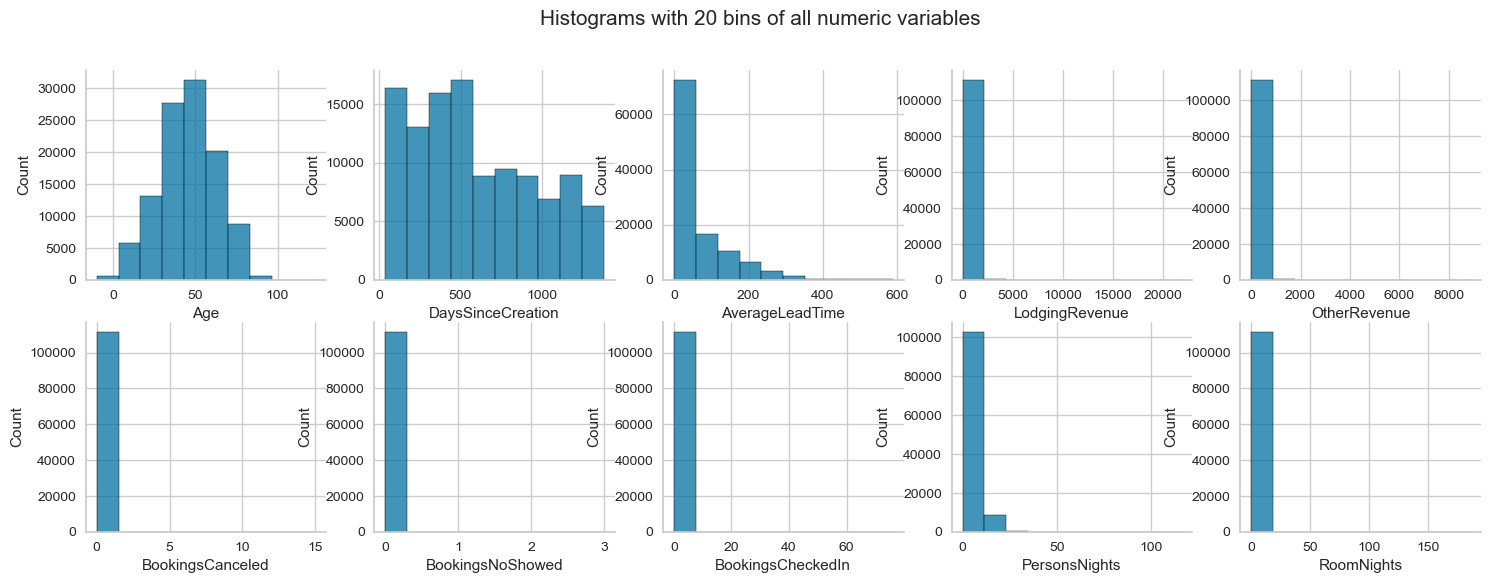

In [7]:
# HISTOGRAM (ALL NUMERIC VARIABLES)
# Identify all numeric variables in the dataset

numerical=['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed',
          'BookingsCheckedIn','PersonsNights','RoomNights']

fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(dataset[numerical], ax.flatten()):
    g = sns.histplot(data=dataset,bins=10,x=var,ax=subplot,kde=False)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=15);

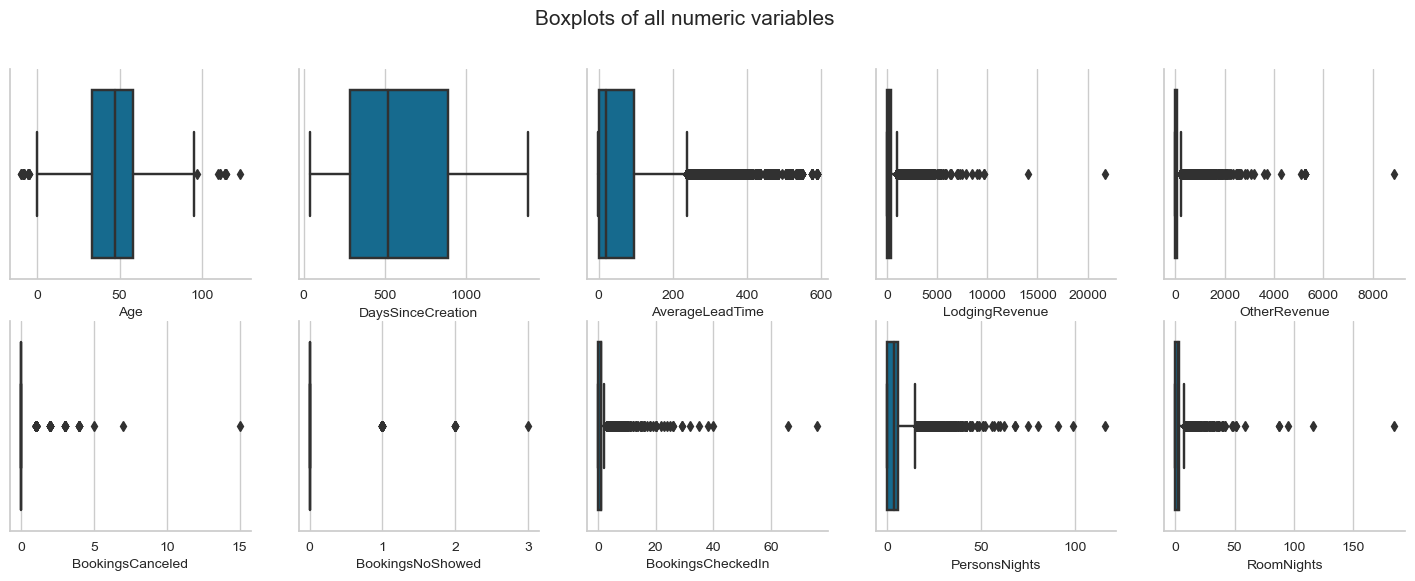

In [8]:
# BOXPLOT (ALL NUMERIC VARIABLES)

fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(dataset[numerical], ax.flatten()):
    g = sns.boxplot(data=dataset,x=var,ax=subplot)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Boxplots of all numeric variables", fontsize=15);

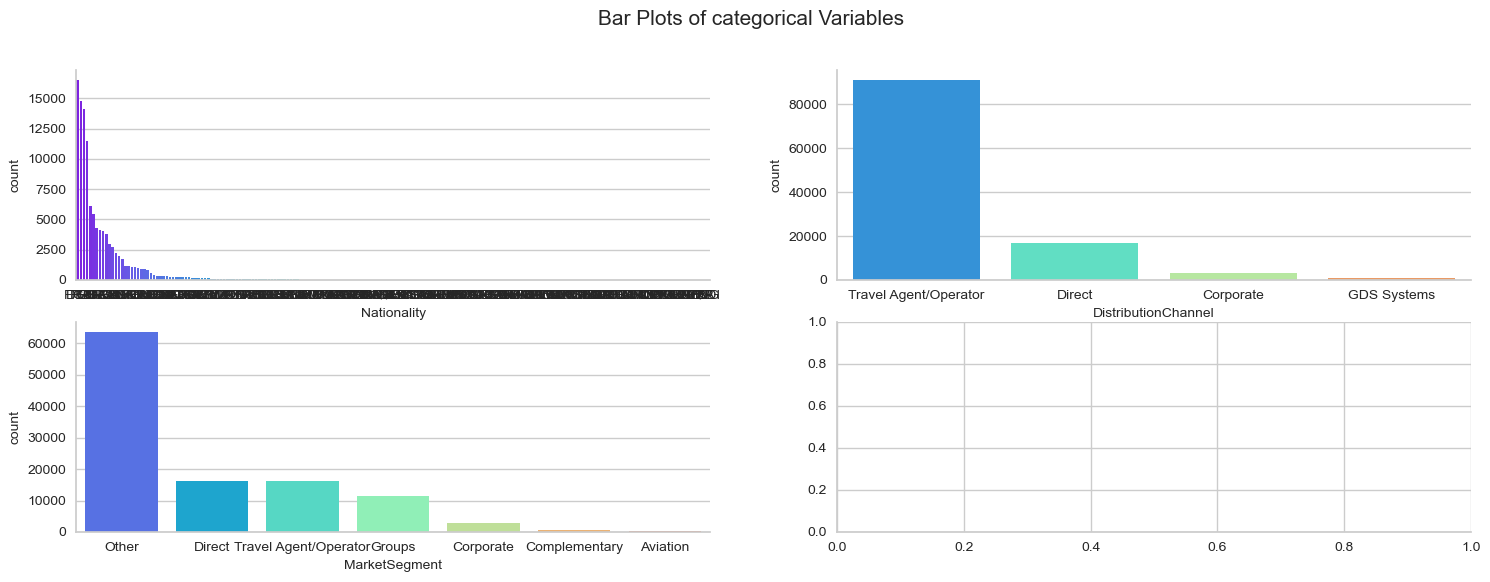

In [9]:
# BARPLOTS (CATEGORICAL VARIABLES)

# Identify all categorical variables
categorical=['Nationality','DistributionChannel', 'MarketSegment']

# Draw
fig, ax = plt.subplots(2, 2, figsize=(18,6))
for var, subplot in zip(dataset[categorical], ax.flatten()):
    g = sns.countplot(x=var ,data=dataset, order=dataset[var].value_counts().index,palette='rainbow' ,ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Bar Plots of categorical Variables", fontsize=15);

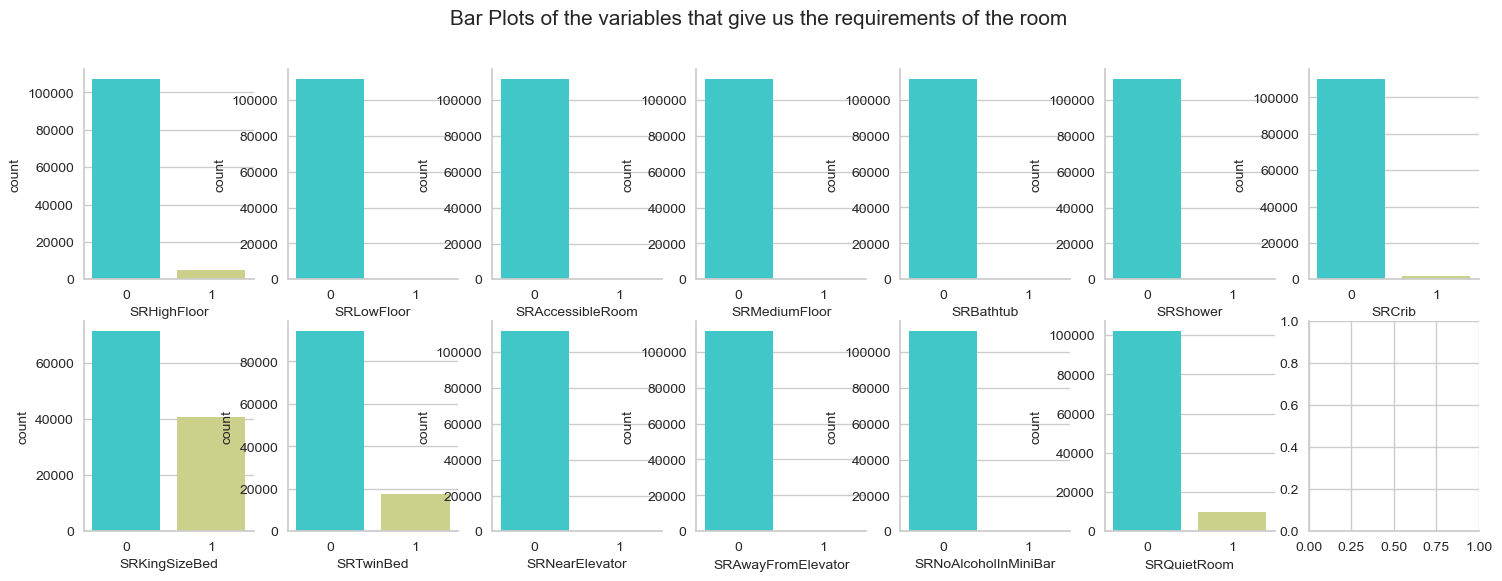

In [10]:
# BARPLOTS (VARIABLES THAT GIVE US THE INFORMATION ABOUT THE REQUESTS ABOUT THE ROOM)
# Identify all categorical variables (In this case they are binary)

categorical_room=['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
        'SRQuietRoom']

fig, ax = plt.subplots(2, 7, figsize=(18,6))
for var, subplot in zip(dataset[categorical_room], ax.flatten()):
    g = sns.countplot(x=var ,data=dataset, palette='rainbow',ax=subplot)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Bar Plots of the variables that give us the requirements of the room", fontsize=15);

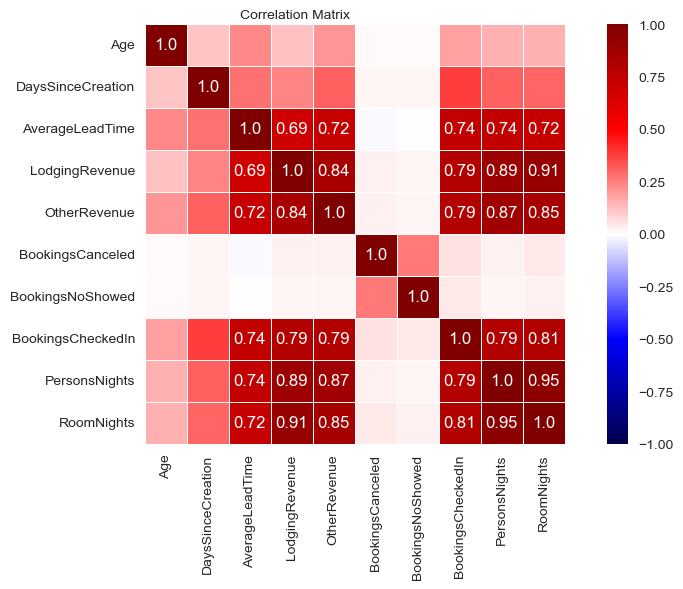

In [11]:
#CORRELATION MATRIX

fig = plt.figure(figsize = (11, 5))
corr = np.round(dataset[numerical].corr(method='spearman'),2)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))
sns.heatmap(data = corr, annot = annot, cmap = plt.cm.seismic, fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, 
             linewidths = 0.5)
fig.subplots_adjust(top = 0.95)
fig.suptitle("Correlation Matrix", fontsize = 10)
plt.show()

In [12]:
# Exploration of categorical variables: cross table of 'MarketSegment' and 'DistributionChannel'
crosstable = pd.crosstab(index=dataset['MarketSegment'], columns= dataset['DistributionChannel'])
crosstable

DistributionChannel,Corporate,Direct,GDS Systems,Travel Agent/Operator
MarketSegment,,,,
Aviation,281,0,0,7
Complementary,19,510,0,128
Corporate,2204,51,2,674
Direct,13,15970,7,373
Groups,482,171,5,10803
Other,37,151,677,62815
Travel Agent/Operator,99,30,5,16219


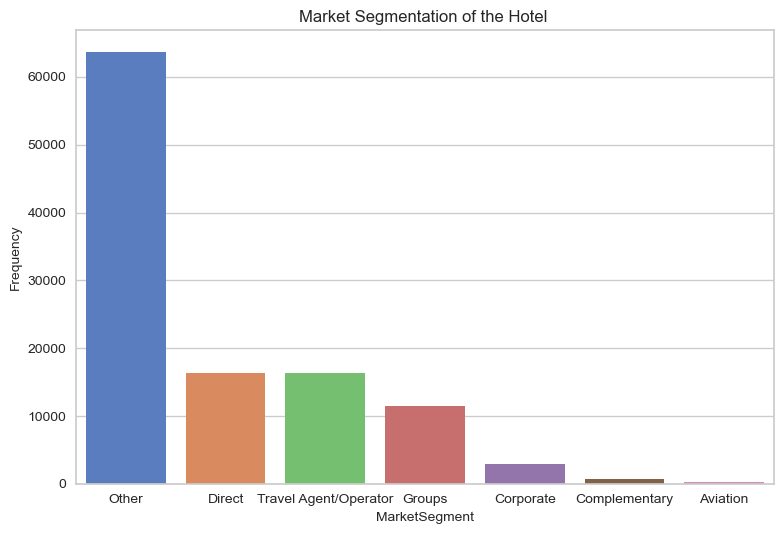

In [13]:
sns.countplot(x='MarketSegment' ,data=dataset, order=dataset['MarketSegment'].value_counts().index,palette='muted')
plt.xlabel('MarketSegment')
plt.ylabel('Frequency')
plt.title('Market Segmentation of the Hotel ')
plt.tight_layout()

In [14]:
#Check the frequency that each country appears. Investiagte the Nationality variable
#Frequency of each country
crosstable_1 = pd.crosstab(dataset['Nationality'], 'frequency')
crosstable_1.sort_values(by="frequency",ascending=False).head(5).T

#Percentage of each country considering all the data
percent_table=crosstable_1/len(dataset)*100
percent_table.sort_values(by="frequency",ascending=False).head(5).T

Nationality,FRA,DEU,PRT,GBR,ESP
col_0,,,,,
frequency,14.781667,13.250338,12.620264,10.258384,5.480028


In [15]:
#Check the frequency that countries appears
len(crosstable_1[crosstable_1['frequency']<1000])

179

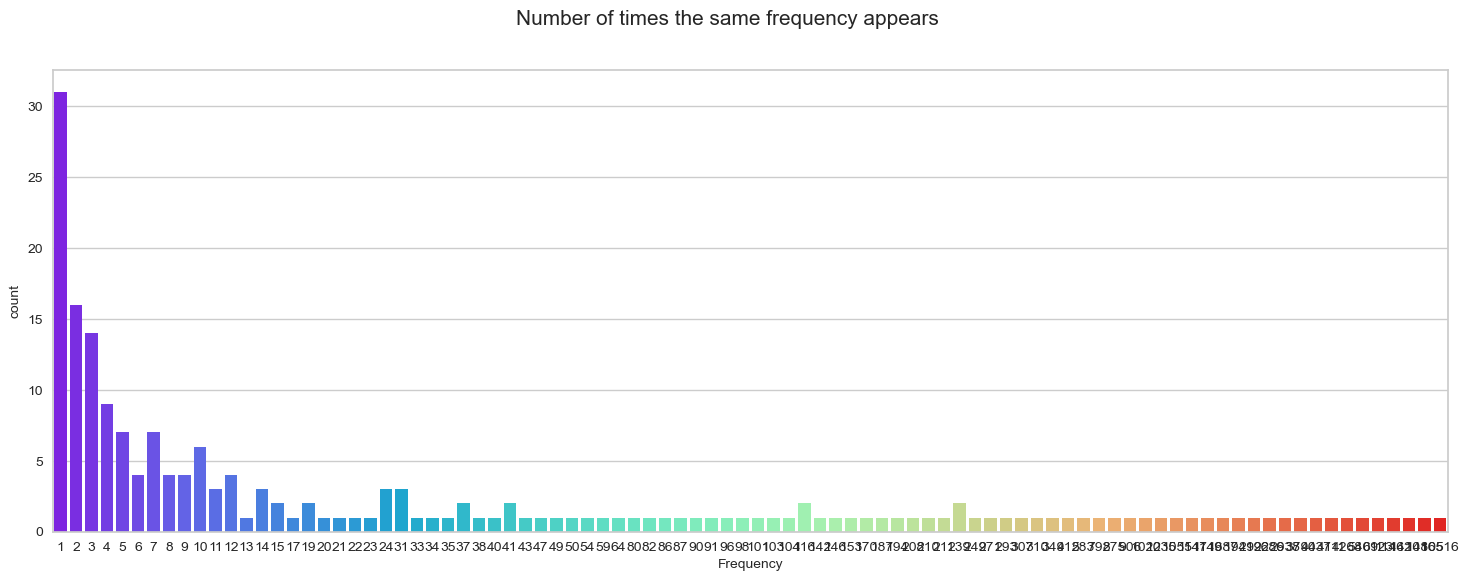

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))
sns.countplot(x='frequency' ,data=crosstable_1, palette='rainbow')
plt.xlabel("Frequency")
plt.ylabel("count")
plt.rc('axes', labelsize=10)
fig.suptitle("Number of times the same frequency appears", fontsize=15);

#### Verify Data Quality

In [17]:
#Check missing values
dataset.isnull().sum()

ID                         0
Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

Clients Dataset Analysis

In [18]:
# Customer with some type of Booking (CheckedIn, Canceled, NoShowed)
#dataframe with the clients that went to the Hotel or did some Reservation
clients=dataset[(dataset['BookingsCanceled']!=0)|(dataset['BookingsNoShowed']!=0)|(dataset['BookingsCheckedIn']!=0)]
clients

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,0xA3CF1A4692BE0A17CFD3BFD9C07653556BDADF5F4BE7...,0x506065FBCE220DCEA4465C7310A84F04165BCB5906DC...,58,230.00,24.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,0x165B609162C92BF563E96DB03539363F07E784C219A8...,0x6BB66BA80C726B9967988A889D83699B609D11C65AD7...,38,535.00,94.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,111725,ESP,60.0,37,0x0BD0E67519BA9C6A100F53BE45C8B5E4FDFE79CAB071...,0xF47AA4F8422F4922863FAA5F18E30E6F8A9981D1EE7C...,43,875.00,167.8,0,...,0,0,0,0,0,1,1,0,0,0
111726,111727,PRT,51.0,37,0x438E070937F7AB205414A419AF5D17520D3E89C49960...,0xFBDAEBF917AF8A24541A54251297EB4DA9E1C40C3C9F...,7,173.55,18.0,0,...,0,0,0,0,0,0,0,0,0,1
111727,111728,DEU,34.0,36,0x39BEF6C854451EC00FD7C79A8E1B3F8DFC40BDEEC217...,0x563B66C0301693C2BAEEDFA2340820F3A51BAA895B1E...,41,98.00,14.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
clients.isna().sum()

ID                         0
Nationality                0
Age                     3047
DaysSinceCreation          0
NameHash                   0
DocIDHash                  4
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [20]:
#From the clients how many dont have 'DocIDHash'
clients[clients['DocIDHash'].isna()][['Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
        'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights']]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
58,PRT,NaN,1385,0x51764F97FD9E3426C98D7DFEFE3A2A2D3C724089ECFB...,NaN,0,0.0,2.00,0,0,2,2,2
944,PRT,NaN,1350,0xCDA04881493C308AD327EC8BD0CF014DD514E90F48B9...,NaN,0,54.0,42.00,0,0,2,6,4
20496,PRT,NaN,1020,0xC6E889DC7511C94DB21A4BA17711C5AFB56C18B9AB9B...,NaN,9,0.0,39.00,0,0,2,6,3
35429,PRT,NaN,780,0xAAD113AA0A812CB11CF085F14B8AB57A1DA6F433D338...,NaN,4,1852.0,361.92,0,0,2,6,4


In [21]:
#Check if we have clients without Nights at the Hotel
clients[(clients['PersonsNights']==0) & (clients['RoomNights']==0)]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
47034,47035,USA,38.0,599,0xF7AF83C7E570B4E929A21225DA15EDAD1EAF33C9226E...,0x2C7A2BA2FE12FC4BBA48C1D55789E2BEFC23027F05BD...,0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Check if we have clients with CheckedIn without Revenue
clients[(clients['LodgingRevenue']==0) & (clients['OtherRevenue']==0) &(clients['BookingsCheckedIn']!=0)]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
38,39,PRT,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
39,40,PRT,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
629,630,PRT,46.0,1362,0x65A26CC5AA4DA0FE145C848C955F2D8A7F852DB78547...,0x5E9904C097C496B8C002D9E7F9F1AC145252C226DBB7...,1,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
631,632,PRT,NaN,1362,0x382AE8A7FF864DC64B3B66727EBD610D68068BD5CA1A...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,2,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
680,681,PRT,NaN,1360,0x7FF6B1BA3C76DDE2371DDB19F0AF3251438B6DE0349C...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106120,106121,PRT,39.0,81,0x33528842AC6715327408D88ABC085392C20C06AB7E14...,0x2C75B1971369B3BACB93E2AB7F7BAB5FEA89CFB21B47...,3,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
106397,106398,PRT,56.0,79,0xBAE14E9ADB904ADBB358EF47D35AA1BD545C5C4DC08D...,0xB46B1C260C7D776327573FBBDE64CB94CCABAE2BEDB2...,263,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
109311,109312,PRT,48.0,55,0x6303926D8892037E60B7A372DFE7D2FAD544420B566C...,0x8FEA25577B5C3BD878128DFDF0EE140B7CEBE5F2BFCC...,8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
109365,109366,PRT,59.0,55,0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...,0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...,1,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
#Check if we have more 'RoomNights' than 'PersonsNights'
clients[(clients['RoomNights']>clients['PersonsNights'])]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2159,2160,PRT,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,20,8493.65,2587.50,3,...,0,0,0,0,1,0,0,0,0,0
2756,2757,PRT,NaN,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.00,1584.00,1,...,0,0,0,0,0,0,0,0,0,0
2842,2843,PRT,NaN,1314,0xDCA87EABFF56A1A313E731ED676F25361722AB5AE790...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,8,0.00,5105.50,0,...,0,0,0,0,0,0,0,0,0,0
4195,4196,PRT,45.0,1288,0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...,0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...,75,138.00,38.50,0,...,0,0,0,0,0,0,0,0,0,0
10150,10151,PRT,66.0,1189,0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...,0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...,42,826.00,173.00,3,...,0,0,0,0,1,0,0,0,0,0
15415,15416,PRT,49.0,1112,0xF4F7ED49904EB1F7A72F33A071F96CE533019C81DF96...,0x6541AF2C1E55C2D3EC17E89DEDD22FE0EBB47AB92305...,0,858.15,114.00,0,...,0,0,0,0,0,0,0,0,0,0
18977,18978,USA,47.0,1057,0x82FDEEE5403B80470AABEC952A25DB7D37BEF253BD5C...,0xA0EA86D350113A03143831212044DE6CE61C2484CB18...,17,140.82,6.00,0,...,0,0,0,0,0,0,0,0,0,0
25308,25309,ESP,52.0,929,0xDF5D8EAC38850FC98D7D5822110B10A44662D9D92279...,0xA508EDBFE269E231546629F11587FA2AAD4DE4851A31...,7,2114.00,376.60,1,...,0,0,0,0,0,0,0,0,0,0
26825,26826,PRT,38.0,905,0x257B8DC0708BF75D2A3869648C15B36317B272A1D69B...,0xD37A405EAA2BF8D23CB44A9AE3C2A7BEC4C5A726BEE2...,18,297.00,172.90,0,...,0,0,0,0,1,1,0,0,0,0
27110,27111,GRC,52.0,901,0x04F37DBBE0138585CD31BC820E2C780F992915176507...,0x3FAE56E6A0168E9130F12E58CF45CDAAE18477EF809C...,7,3066.00,347.30,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
#Check if all Customer with CheckedIn have 'Nights'
clients[((clients['RoomNights']==0) | (clients['PersonsNights']==0)) &(clients['BookingsCheckedIn']!=0)][['RoomNights','PersonsNights','BookingsCheckedIn']]

,RoomNights,PersonsNights,BookingsCheckedIn
43673,4,0,1
80036,2,0,1
85780,3,0,1
90374,2,0,1


In [25]:
#Check Customer with revenue but without 'Nights'
clients[((clients['RoomNights']==0)|(clients['PersonsNights']==0))&(clients['LodgingRevenue']!=0)]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
43673,43674,NLD,33.0,641,0x65E5986F79B75C8A171FEEA2E534AAD806D5ACB083D6...,0x67D8A25C96313AEF8A5842A87F2F6AB29DE01DAC80BE...,41,267.0,109.0,0,...,0,0,0,0,0,1,0,0,0,0
80036,80037,BRA,35.0,336,0x0596170AE19299CB3CEBA98BC2FAF9BF5333031C6A32...,0x8186236B5A280E296DC622D0B419BBEBB5BC8E1D4338...,63,242.0,24.0,0,...,0,0,0,1,1,0,0,0,0,0
85780,85781,USA,67.0,259,0xD0C14D44BB72D7FA9673B2EE2EE9C8021EBDF81A7EF0...,0x420A533D66150B9173FAB8F5AF0DB8C54EBDFA001663...,1,314.4,141.1,0,...,0,0,0,0,1,0,0,0,0,0
90374,90375,DEU,52.0,214,0xFC913F891030DD576FDA085E7859D44AB7EE8B000D59...,0x050B3FEBB73D2924810D9C068846F14550B03BCFDC7C...,36,2514.0,103.5,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Check Clients with 'Age'<0
clients[clients['Age']<0]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
5127,5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,...,0,0,0,0,1,0,0,0,0,0
6751,6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,...,0,0,0,0,1,0,0,0,0,0
8360,8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,...,0,0,0,0,0,1,0,0,0,0
8628,8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,...,0,0,0,0,1,0,0,0,0,0
9919,9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,...,0,0,0,0,1,0,0,0,0,0
10662,10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,...,0,0,0,0,0,0,0,0,0,0
10694,10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,...,0,0,0,0,0,0,0,0,0,0
10755,10756,PRT,-5.0,1181,0x5EE2C0A0277DCB4FA8ADEADA1889B116070A5AC36018...,0x62F41BDB35750405347C6BF370EFDA9C243E668F03F7...,292,128.00,55.00,0,...,0,0,0,0,0,0,0,0,0,0
14321,14322,PRT,-9.0,1127,0x1CAB5F2499541D0D158D45EF7EC4525F147E3AFAA9B0...,0x1E7889105D403E16866352792818A8745CAF70514A8E...,346,128.00,53.00,0,...,0,0,0,0,0,0,0,0,0,0
15104,15105,DEU,-10.0,1117,0x4E45A8F302884C4BE0498083911400F8A51BF317A3EE...,0xED40A2468984E298030A9DCCB5BAA60B3979D4609383...,276,240.00,61.25,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Check Clients with 'AverageLeadTime'<0
clients[clients['AverageLeadTime']<0]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
23063,23064,PRT,NaN,964,0x498F10CD065519D5A08A680309214C7911457CF2A5CC...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,-1,352.00,30.0,0,...,0,0,0,0,0,0,0,0,0,0
29373,29374,USA,25.0,870,0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...,0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...,-1,77.49,3.0,0,...,0,0,0,0,0,0,0,0,0,0
51374,51375,CHN,33.0,558,0x61B41490861314B7148F76EE7D7E17A240A86B45259D...,0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...,-1,129.00,2.0,0,...,0,0,0,0,0,0,0,0,0,0
58654,58655,FRA,57.0,499,0x7E60C14F1CDF540841373495CA352FA8579EA1166911...,0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...,-1,149.00,2.0,0,...,0,0,0,0,0,0,0,0,0,0
58661,58662,FRA,62.0,499,0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...,0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...,-1,149.00,2.0,0,...,0,0,0,0,0,0,0,0,0,0
58675,58676,FRA,61.0,499,0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...,0x814B89362FCA5770AEDC4485136D7F673F78793CE218...,-1,149.00,2.0,0,...,0,0,0,0,0,0,0,0,0,0
60589,60590,ESP,46.0,485,0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...,0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...,-1,159.00,2.0,0,...,0,0,0,0,0,0,0,0,0,0
62689,62690,USA,70.0,468,0x4567E92118939CF20A432369E32BA8959502682AD473...,0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...,-1,95.20,2.0,0,...,0,0,0,0,0,0,0,0,0,0
68485,68486,GBR,46.0,424,0x2FFEF9FB8750A5B78550558BCAB6E6FE0EEFB92B53F9...,0x8FDCAADFD9772221E36C47D962BF5BEFC049103778EC...,-1,282.00,24.0,0,...,0,0,0,0,0,0,0,0,0,0
72708,72709,BRA,31.0,394,0xCD4216685825A5A65B100A4F8F19366A23B2BDDE8E29...,0x43126A8B69B8B1E3C1D4513EE586ABE2910947964929...,-1,209.00,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Check Clients with 'Age'<18
clients[clients['Age']<18]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
81,82,ESP,4.0,1384,0x56A42753E724C20D97AFC90256FBB406DBEAADD0DBD8...,0xDC0D71D5D2B392DDC83D0065D409681BE9C745ECE97B...,103,653.40,759.6,0,...,0,0,0,1,1,0,0,0,0,0
352,353,PRT,14.0,1381,0x888C04C4C72349F8B571CD9A79EDB33D580F50143BD0...,0xA9EFC491B14563EBFA14008DF9A4ADB0F9E9BE7473D3...,69,555.00,154.5,0,...,0,0,0,0,0,0,0,0,0,0
681,682,PRT,7.0,1360,0xF3B6954DBC0B761324A9F09FCAB610146EBBB1C9689B...,0x00EC5AC56187FBFB71E11AE4439CA763A5857C12FB43...,4,50.00,14.0,0,...,0,0,0,0,0,0,0,0,0,0
791,792,MAR,14.0,1357,0x426868C45B26B9AB800023AD5701E3AC755847092051...,0xA72741A88993ECDB6D72C427FED25C3D885CA8D9124D...,0,202.00,63.0,0,...,0,0,0,0,0,0,0,0,0,0
1082,1083,FRA,14.0,1345,0x5B30B0C2488EE3CF0A1C5D5A96C344824C71FBD73F10...,0xF866B3E9123B9787D9A003763F17E0DD99173B83881A...,137,180.00,51.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110346,110347,DEU,17.0,48,0xA06043F7FA09008E1A5F6873E8FDF64F32EF53A21D0D...,0xF10F7A3F018DFC36B8A24299DB1ADB8057A8B5EA084F...,204,489.80,120.0,0,...,0,0,0,0,0,0,0,0,0,0
110469,110470,FRA,17.0,47,0x7FF0B44D5CE1708B25709B4C61ECCB2C28FED55216D2...,0x0481361AED23F31C3971C81D28F68B6798C317FAFE3F...,165,519.21,84.0,0,...,0,0,0,0,0,0,0,0,0,0
110614,110615,ESP,17.0,46,0x30369462F294949CC860315B0BAC6264C7873F924540...,0xEA8805DA03319E22E93D16C1C7E0A39FFA08E61ACB88...,81,1680.00,192.0,0,...,0,0,0,0,0,1,0,0,0,0
111316,111317,MEX,17.0,40,0xB57530B36FFDD61BB9C3FE380F50B6CA678BCB5C5FB6...,0x06F0E505DD72E10D5AAD56C5D638167F6A0754EFB314...,47,385.32,34.5,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# How many records with same 'NameHash' and 'DocHash' in clients are repeated
clients[(clients.duplicated(subset=['DocIDHash','NameHash'],keep=False))].sort_values(by='DocIDHash')

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
61250,61251,FRA,60.0,479,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,1,177.0,14.00,0,...,0,0,0,0,1,0,0,0,0,1
61171,61172,FRA,60.0,480,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,127,318.0,148.00,0,...,0,0,0,0,1,0,0,0,0,1
44336,44337,IND,38.0,630,0x9C078C3BE9FDC59F25E736E57DAFBCCDE64197FC560D...,0x000443891856CB5D74287EDBFBE82A4F6D2841F2D1DB...,80,498.0,157.47,0,...,0,0,0,0,0,1,0,0,0,0
44434,44435,IND,38.0,629,0x9C078C3BE9FDC59F25E736E57DAFBCCDE64197FC560D...,0x000443891856CB5D74287EDBFBE82A4F6D2841F2D1DB...,0,249.0,38.00,0,...,0,0,0,0,0,1,0,0,0,0
4187,4188,BRA,49.0,1288,0xC06DD2196934C40F14BBDF6232EFEE10CA9D6792BCD4...,0x0047DA9833B3DF43173A5C25C137D9BEFECF165F81FB...,70,252.9,130.50,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2037,ESP,46.0,1324,0x9A6D4033D479DB80B1EE58A38193FC1481E0943A249B...,0xFFC8E8CE49A4A882225B210B488EB8959153A1CDD538...,116,162.0,21.00,0,...,0,0,0,0,0,0,0,0,0,0
44332,44333,NLD,43.0,630,0xC031D142FB99F0722FE4DFD4298AA57CC67C89C68E62...,0xFFD0ED500662142AB2E236798F4E5772353C5CA89DF3...,75,519.0,245.00,0,...,0,0,0,0,0,0,0,0,0,0
42422,42423,NLD,43.0,673,0xC031D142FB99F0722FE4DFD4298AA57CC67C89C68E62...,0xFFD0ED500662142AB2E236798F4E5772353C5CA89DF3...,1,118.0,14.00,0,...,0,0,0,0,0,0,0,0,0,0
27179,27180,USA,39.0,900,0x57FA8ECFDD8904600648B133E19EBA7C82549714E294...,0xFFF7DCF7FE679FB88D0A3D8AB4204A933D00C4A35660...,21,115.0,15.50,0,...,0,0,0,0,1,1,0,0,0,0


In [30]:
#How many records are duplicated (Same person in registered in the database more than 1 time)
clients[(clients.duplicated(subset=['DocIDHash','NameHash'],keep='first'))].sort_values(by='DocIDHash')

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
61250,61251,FRA,60.0,479,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,1,177.00,14.0,0,...,0,0,0,0,1,0,0,0,0,1
44434,44435,IND,38.0,629,0x9C078C3BE9FDC59F25E736E57DAFBCCDE64197FC560D...,0x000443891856CB5D74287EDBFBE82A4F6D2841F2D1DB...,0,249.00,38.0,0,...,0,0,0,0,0,1,0,0,0,0
17747,17748,BRA,49.0,1077,0xC06DD2196934C40F14BBDF6232EFEE10CA9D6792BCD4...,0x0047DA9833B3DF43173A5C25C137D9BEFECF165F81FB...,41,212.00,28.0,0,...,0,0,0,0,0,0,0,0,0,0
107387,107388,DEU,65.0,70,0xC8AF35E633E1666A606BBB0C5E903CE8FFC9F1DF8E26...,0x0066077693FDB7A6DF2185DC53E793FEBFF53FC55F83...,38,377.72,36.0,0,...,0,0,0,0,1,0,0,0,0,0
4776,4777,MAR,39.0,1278,0x3F052A907BC0AE7AB8BF3A3847A1555C45496A101DBD...,0x007FA36153A388E8DD24E3BDABC8F6FD218C535C1B18...,1,89.00,2.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107406,107407,PRT,49.0,70,0x47812B53CDE9B2676D69C52AB0BDD7CF7CA512890E87...,0xFF91D161864F72F305F302EC7838C11B4A1691E02F0F...,13,177.00,24.0,0,...,0,0,0,0,1,0,0,0,0,0
14964,14965,PRT,57.0,1119,0x0A2B8DA5B59919CC06FE27D049E3ED6EB0CDD8223134...,0xFF9675AE80F23755648A49A81175B285AC7A9BFBB9DD...,3,458.05,15.0,0,...,0,0,0,0,0,1,0,0,0,1
2114,2115,ESP,46.0,1323,0x9A6D4033D479DB80B1EE58A38193FC1481E0943A249B...,0xFFC8E8CE49A4A882225B210B488EB8959153A1CDD538...,0,261.00,38.0,0,...,0,0,0,0,0,0,0,0,0,0
44332,44333,NLD,43.0,630,0xC031D142FB99F0722FE4DFD4298AA57CC67C89C68E62...,0xFFD0ED500662142AB2E236798F4E5772353C5CA89DF3...,75,519.00,245.0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# How many clients have same 'DocHash' but different 'NameHash' (Can be the same person but first agreggate the records
#that we know is the same person)
clients[(clients.duplicated(subset=['DocIDHash'],keep='first'))].sort_values(by='DocIDHash')

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
61250,61251,FRA,60.0,479,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,1,177.00,14.00,0,...,0,0,0,0,1,0,0,0,0,1
44434,44435,IND,38.0,629,0x9C078C3BE9FDC59F25E736E57DAFBCCDE64197FC560D...,0x000443891856CB5D74287EDBFBE82A4F6D2841F2D1DB...,0,249.00,38.00,0,...,0,0,0,0,0,1,0,0,0,0
17747,17748,BRA,49.0,1077,0xC06DD2196934C40F14BBDF6232EFEE10CA9D6792BCD4...,0x0047DA9833B3DF43173A5C25C137D9BEFECF165F81FB...,41,212.00,28.00,0,...,0,0,0,0,0,0,0,0,0,0
107387,107388,DEU,65.0,70,0xC8AF35E633E1666A606BBB0C5E903CE8FFC9F1DF8E26...,0x0066077693FDB7A6DF2185DC53E793FEBFF53FC55F83...,38,377.72,36.00,0,...,0,0,0,0,1,0,0,0,0,0
4776,4777,MAR,39.0,1278,0x3F052A907BC0AE7AB8BF3A3847A1555C45496A101DBD...,0x007FA36153A388E8DD24E3BDABC8F6FD218C535C1B18...,1,89.00,2.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44332,44333,NLD,43.0,630,0xC031D142FB99F0722FE4DFD4298AA57CC67C89C68E62...,0xFFD0ED500662142AB2E236798F4E5772353C5CA89DF3...,75,519.00,245.00,0,...,0,0,0,0,0,0,0,0,0,0
28075,28076,USA,39.0,887,0x57FA8ECFDD8904600648B133E19EBA7C82549714E294...,0xFFF7DCF7FE679FB88D0A3D8AB4204A933D00C4A35660...,34,180.00,54.20,0,...,0,0,0,0,0,1,0,0,0,0
944,945,PRT,NaN,1350,0xCDA04881493C308AD327EC8BD0CF014DD514E90F48B9...,NaN,0,54.00,42.00,0,...,0,0,0,0,0,0,0,0,0,0
20496,20497,PRT,NaN,1020,0xC6E889DC7511C94DB21A4BA17711C5AFB56C18B9AB9B...,NaN,9,0.00,39.00,0,...,0,0,0,0,1,0,0,0,0,0


No clients Dataset Analysis

In [32]:
# Customer without any kind of Booking (CheckedIn, Canceled, NoShowed)
no_clients=dataset[(dataset['BookingsCanceled']==0)&(dataset['BookingsNoShowed']==0)&(dataset['BookingsCheckedIn']==0)]
no_clients

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111723,111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111725,111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,...,0,0,0,0,0,1,1,0,0,0
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
no_clients.isna().sum()

ID                         0
Nationality                0
Age                     1125
DaysSinceCreation          0
NameHash                   0
DocIDHash                997
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [34]:
#No_Clients where 'AverageLeadTime' is different from 0 
no_clients[no_clients['AverageLeadTime']!=0]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
70579,70580,PRT,NaN,410,0x68573FCBE31A16536960950762FD290A46A8BDEE8F06...,NaN,114,249.3,18.0,0,...,0,0,0,0,0,0,0,0,0,0
97312,97313,GBR,30.0,155,0xCEAD2049492493DCC75718D30A0E084F88642D48A8A2...,0x377CACB1D40FE2F51A4882C5B40E7FDDC1DDAA10D19D...,349,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
#No_clients with Revenue
no_clients[(no_clients['LodgingRevenue']!=0)|(no_clients['OtherRevenue']!=0)]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
70579,70580,PRT,NaN,410,0x68573FCBE31A16536960950762FD290A46A8BDEE8F06...,NaN,114,249.3,18.0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#How many records are duplicated (Same person in registered in the database more than 1 time)
no_clients[(no_clients.duplicated(subset=['DocIDHash','NameHash'],keep=False))].sort_values(by='DocIDHash')

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
104348,104349,FRA,27.0,95,0xECEF0F291CF78E1E87B60A03DF44E688676294D95994...,0x0179166EDC4E0689B8D450EA1673D4CBEC5193B4374E...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
104059,104060,FRA,27.0,97,0xECEF0F291CF78E1E87B60A03DF44E688676294D95994...,0x0179166EDC4E0689B8D450EA1673D4CBEC5193B4374E...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
44793,44794,CHN,13.0,624,0xF4A6C545110436B80ACF368E8E81A204A21B0C6EF8AB...,0x0199BFB69A41B191580CDE42802B32A193EFE1028E77...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
45154,45155,CHN,13.0,618,0xF4A6C545110436B80ACF368E8E81A204A21B0C6EF8AB...,0x0199BFB69A41B191580CDE42802B32A193EFE1028E77...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
103863,103864,IRL,82.0,99,0xE25B97508737364D4F40F499D3D2FC4D1F007EEE8B2C...,0x01E41DD3BD21333581F748B7EAA09B018DC918AEBC06...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109711,109712,PRT,NaN,53,0x6B3D0FFF4F0A740A9A2B6B555B354801B280E697D368...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
110573,110574,PRT,NaN,46,0xB6280A5EAA35679770D4163A08B96851ED16236559DB...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
110574,110575,PRT,NaN,46,0xB6280A5EAA35679770D4163A08B96851ED16236559DB...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
110575,110576,PRT,NaN,46,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#How many records are duplicated (Same person in registered in the database more than 1 time)
no_clients[(no_clients.duplicated(subset=['DocIDHash','NameHash'],keep='first'))].sort_values(by='DocIDHash')

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
104348,104349,FRA,27.0,95,0xECEF0F291CF78E1E87B60A03DF44E688676294D95994...,0x0179166EDC4E0689B8D450EA1673D4CBEC5193B4374E...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
45154,45155,CHN,13.0,618,0xF4A6C545110436B80ACF368E8E81A204A21B0C6EF8AB...,0x0199BFB69A41B191580CDE42802B32A193EFE1028E77...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
103863,103864,IRL,82.0,99,0xE25B97508737364D4F40F499D3D2FC4D1F007EEE8B2C...,0x01E41DD3BD21333581F748B7EAA09B018DC918AEBC06...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
47647,47648,BEL,56.0,592,0x51CFF65EC00474A963947422916317C24115451179DC...,0x0562BEF6963635380C034B9D523488E8D2BB74CE5755...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
94593,94594,PRT,28.0,176,0x73159368649E55CA2F1B59E5BC1CA3EEF4F2D734CA8B...,0x059EA3C2F284CE68D05B07C704F65A6BF455F43D85B9...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109466,109467,PRT,NaN,54,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
109711,109712,PRT,NaN,53,0x6B3D0FFF4F0A740A9A2B6B555B354801B280E697D368...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
110574,110575,PRT,NaN,46,0xB6280A5EAA35679770D4163A08B96851ED16236559DB...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
110575,110576,PRT,NaN,46,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# How many people have same 'DocIDHash' but different 'NameHash' (Can be the same person but first agreggate the records
#that we know is the same person)
no_clients[(no_clients.duplicated(subset=['DocIDHash'],keep='first'))].sort_values(by='DocIDHash')

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
84242,84243,PRT,40.0,284,0xC11F957F2DBD762F1BF5A5255194780DA14EC1F00A12...,0x01260DFFCBA469ACC5DB0D265B892D5DF7F149CE3016...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
104348,104349,FRA,27.0,95,0xECEF0F291CF78E1E87B60A03DF44E688676294D95994...,0x0179166EDC4E0689B8D450EA1673D4CBEC5193B4374E...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
45154,45155,CHN,13.0,618,0xF4A6C545110436B80ACF368E8E81A204A21B0C6EF8AB...,0x0199BFB69A41B191580CDE42802B32A193EFE1028E77...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
103863,103864,IRL,82.0,99,0xE25B97508737364D4F40F499D3D2FC4D1F007EEE8B2C...,0x01E41DD3BD21333581F748B7EAA09B018DC918AEBC06...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
58550,58551,RWA,61.0,500,0x5F65572E7EE2B6142D45FEA99EFF6FBA22F4292D0707...,0x022E692BFBE2E27F1C40A9931A39B286C3CE0CA540EC...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111125,111126,PRT,NaN,41,0x3F64D3C2CFAD527825C5597E4BBDDA9E0F566ACE903E...,NaN,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111548,111549,PRT,NaN,39,0x7B3319EA712262C2CCB36BD025636C8D95C32846F125...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
111630,111631,PRT,NaN,37,0xC3B0C105F99A992FAC2D08EC52356248A665821468CF...,NaN,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
111633,111634,PRT,NaN,37,0x32E38284BCC52BC1953CC30E2E18A673C42D38F7A2E0...,NaN,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


<a class="anchor" id="4">

# 4. Data Preparation
    
</a>

#### Select Data

Until now we have 2 distinct profiles:
- Clients with Bookings (CheckedIn, Canceled, NoShowed)
- People without any type of Booking

However, for our marketing Segmentation we will only consider the Clients with some type of Booking, as they are the most useful and valuable customers. The other dataset might not contain truthfull information as it will contaminate our segmentation.
So, in this way, all of our changes and Data Preparation will be focused only on Clients Dataset.


#### Clean Data

In [39]:
#Create a copy of Clients Dataframe
#Now we will clean the Clients dataset (inconsistencies, Merge the rows corresponding to the same person, etc...) 
clients_work=clients.copy()

In [40]:
# Remove inconsistencies: 
#    - Negative 'Age'
#    - Negative 'Average Lead Time'
#    - Missing values in 'DocIDHash'
clients_work.drop(clients_work[clients_work.Age < 0].index,inplace=True)
clients_work.drop(clients_work[clients_work.AverageLeadTime < 0].index,inplace=True)
clients_work.dropna(axis=0, subset=['DocIDHash'],inplace=True)

In [41]:
# Merge the rows corresponding to the same person (same Name and same DocId), aggregate features with sum, mean and last updated.

clients_work=clients_work.groupby(['NameHash', 'DocIDHash']).agg({'ID': 'last', 'Nationality': 'last', 'Age': 'last', 'DaysSinceCreation': 'max',
                                                            'AverageLeadTime': 'mean', 'LodgingRevenue': 'sum', 'OtherRevenue': 'sum', 'BookingsCanceled': 'sum',
                                                            'BookingsNoShowed': 'sum', 'BookingsCheckedIn': 'sum', 'PersonsNights': 'sum', 'RoomNights': 'sum',
                                                            'DistributionChannel': 'last', 'MarketSegment': 'last', 'SRHighFloor': 'mean', 'SRLowFloor': 'mean',
                                                            'SRAccessibleRoom': 'mean', 'SRMediumFloor': 'mean', 'SRBathtub': 'mean', 'SRShower': 'mean',
                                                            'SRCrib': 'mean', 'SRKingSizeBed': 'mean', 'SRTwinBed': 'mean', 'SRNearElevator': 'mean',
                                                            'SRAwayFromElevator': 'mean', 'SRAwayFromElevator': 'mean', 'SRNoAlcoholInMiniBar': 'mean', 'SRQuietRoom': 'mean'})

# We applied:
# - mean to the 'SR...' features e "AverageLeadTime"
# - sum to "RoomNights", PersonsNights, OtherRevenue, LodgingRevenue,BookingsCanceled, BookingsNoShowed, BookingsCheckedIn
# - 'last' remaining the most recet value to ID, Nationality, Age, DistributionChannel, MarketSegment
# - 'max' remaining the biggest value to DaysSinceCreation

#Reset the index
clients_work.reset_index(inplace=True)

#Round 'SR' columns to have just the values 0 and 1
clients_work=clients_work.round({'AverageLeadTime':0,'SRHighFloor':0, 'SRLowFloor':0, 'SRAccessibleRoom':0, 'SRMediumFloor':0, 'SRBathtub':0, 
        'SRShower':0,'SRCrib':0, 'SRKingSizeBed':0, 'SRTwinBed':0, 'SRNearElevator':0,'SRAwayFromElevator':0,
        'SRAwayFromElevator':0, 'SRNoAlcoholInMiniBar':0, 'SRQuietRoom':0})

In [42]:
# Merge the rows corresponding to the same person (but registered with different names), 
# aggregate features with sum, mean and last updated.

clients_work=clients_work.groupby(['DocIDHash']).agg({'ID': 'last','NameHash':'last', 'Nationality': 'last', 'Age': 'last', 'DaysSinceCreation': 'max',
                                                            'AverageLeadTime': 'mean', 'LodgingRevenue': 'sum', 'OtherRevenue': 'sum', 'BookingsCanceled': 'sum',
                                                            'BookingsNoShowed': 'sum', 'BookingsCheckedIn': 'sum', 'PersonsNights': 'sum', 'RoomNights': 'sum',
                                                            'DistributionChannel': 'last', 'MarketSegment': 'last', 'SRHighFloor': 'mean', 'SRLowFloor': 'mean',
                                                            'SRAccessibleRoom': 'mean', 'SRMediumFloor': 'mean', 'SRBathtub': 'mean', 'SRShower': 'mean',
                                                            'SRCrib': 'mean', 'SRKingSizeBed': 'mean', 'SRTwinBed': 'mean', 'SRNearElevator': 'mean',
                                                            'SRAwayFromElevator': 'mean', 'SRAwayFromElevator': 'mean', 'SRNoAlcoholInMiniBar': 'mean', 'SRQuietRoom': 'mean'})

# We applied:
# - mean to the 'SR...' features e "AverageLeadTime"
# - sum to "RoomNights", PersonsNights, OtherRevenue, LodgingRevenue,BookingsCanceled, BookingsNoShowed, BookingsCheckedIn
# - 'last' remaining the most recet value to ID, Nationality, Age, DistributionChannel, MarketSegment
# - 'max' remaining the biggest value to DaysSinceCreation

#Reset the index
clients_work.reset_index(inplace=True)

#Round 'SR' columns to have just the values 0 and 1
clients_work=clients_work.round({'AverageLeadTime':0,'SRHighFloor':0, 'SRLowFloor':0, 'SRAccessibleRoom':0, 'SRMediumFloor':0, 'SRBathtub':0, 
        'SRShower':0,'SRCrib':0, 'SRKingSizeBed':0, 'SRTwinBed':0, 'SRNearElevator':0,'SRAwayFromElevator':0,
        'SRAwayFromElevator':0, 'SRNoAlcoholInMiniBar':0, 'SRQuietRoom':0})

In [43]:
#Check missing values before the KNN imputer
clients_work.isnull().sum()

DocIDHash                 0
ID                        0
NameHash                  0
Nationality               0
Age                     211
DaysSinceCreation         0
AverageLeadTime           0
LodgingRevenue            0
OtherRevenue              0
BookingsCanceled          0
BookingsNoShowed          0
BookingsCheckedIn         0
PersonsNights             0
RoomNights                0
DistributionChannel       0
MarketSegment             0
SRHighFloor               0
SRLowFloor                0
SRAccessibleRoom          0
SRMediumFloor             0
SRBathtub                 0
SRShower                  0
SRCrib                    0
SRKingSizeBed             0
SRTwinBed                 0
SRNearElevator            0
SRAwayFromElevator        0
SRNoAlcoholInMiniBar      0
SRQuietRoom               0
dtype: int64

In [44]:
# 4. Input missing values in 'Age' by the KNN approach 

# Identify all numeric variables in the dataset
numerical=['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed',
          'BookingsCheckedIn','PersonsNights','RoomNights']

# Convert the missing values by the KNN approach
imputer = KNNImputer(n_neighbors=100, weights="uniform")
clients_work[numerical] = imputer.fit_transform(clients_work[numerical])


In [45]:
#5. :  People under 16 years old as they won´t be our target for the marketing approach.
clients_work.drop(clients_work[clients_work.Age < 16].index,inplace=True)

Now that our dataset is clean, we can start to do some changes to prepares the final data set for modeling.

In [46]:
#Reset Index
clients_work.reset_index(drop=True, inplace=True)

In [47]:
# 2. Remove columns that should not be used as they do not represent customer's characteristics or behavior:
# 'DocIDHash','NameHash' ,'ID', 'MarketSegment' 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
# 'SRBathtub', 'SRShower', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar','SRCrib'

#The 'SR' variables with very low frequency in category 1 or category 0 was irrelevant for this marketing segmentation
# so we discard


not_used_columns=['DocIDHash','NameHash' ,'ID', 'MarketSegment' ,'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
                 'SRBathtub', 'SRShower', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar','SRCrib']
clients_work.drop(columns=not_used_columns, inplace=True)

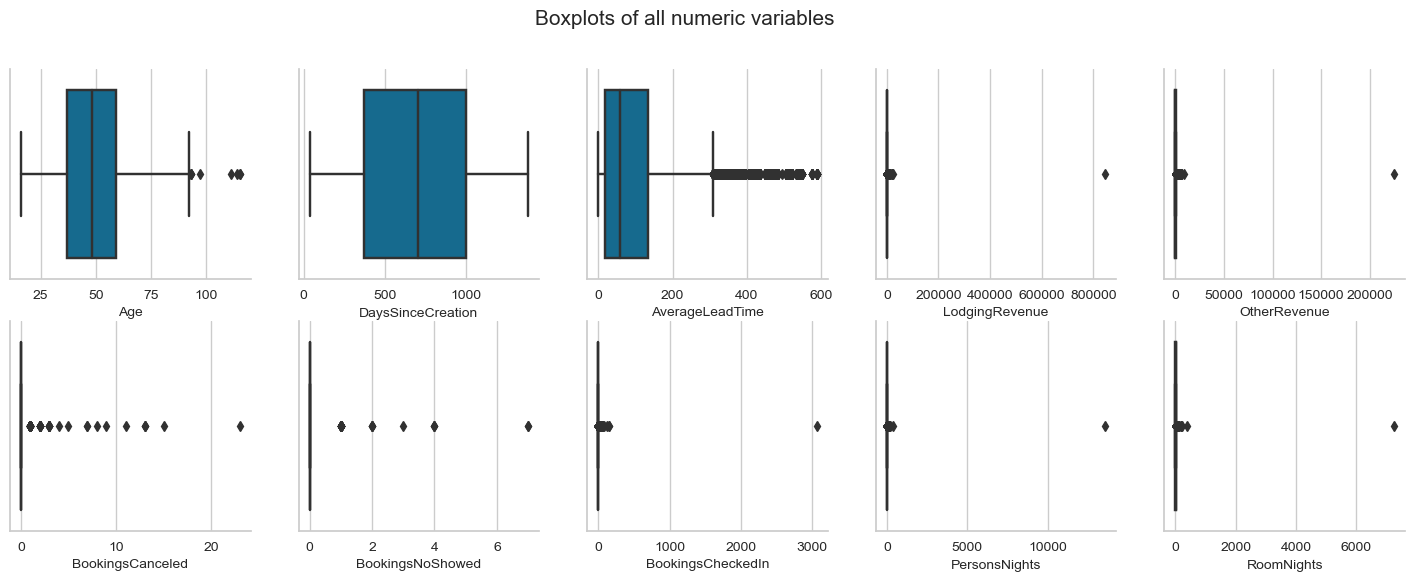

In [48]:
#Create Boxplot Visualizations before removing outliers
clients_work_with_Outliers = clients_work.copy()

fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(clients_work_with_Outliers[numerical], ax.flatten()):
    g = sns.boxplot(data=clients_work_with_Outliers,x=var,ax=subplot)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Boxplots of all numeric variables", fontsize=15);

In [47]:
#3. Remove Outliers manually
# With this we are removing just 3% of our dataset_final. We keep with (83065 records)


filters = (
    (clients_work_with_Outliers['AverageLeadTime']<400)
    &
    (clients_work_with_Outliers['LodgingRevenue']<2500)
    &
    (clients_work_with_Outliers['OtherRevenue']<500)
    &
    (clients_work_with_Outliers['BookingsCheckedIn']<20)
    &
    (clients_work_with_Outliers['PersonsNights']<30)
    &
    (clients_work_with_Outliers['RoomNights']<40))

clients_work = clients_work_with_Outliers[filters]

print('Percentage of data kept after removing outliers:', np.round(clients_work.shape[0] / clients_work_with_Outliers.shape[0], 4))

Percentage of data kept after removing outliers: 0.9704


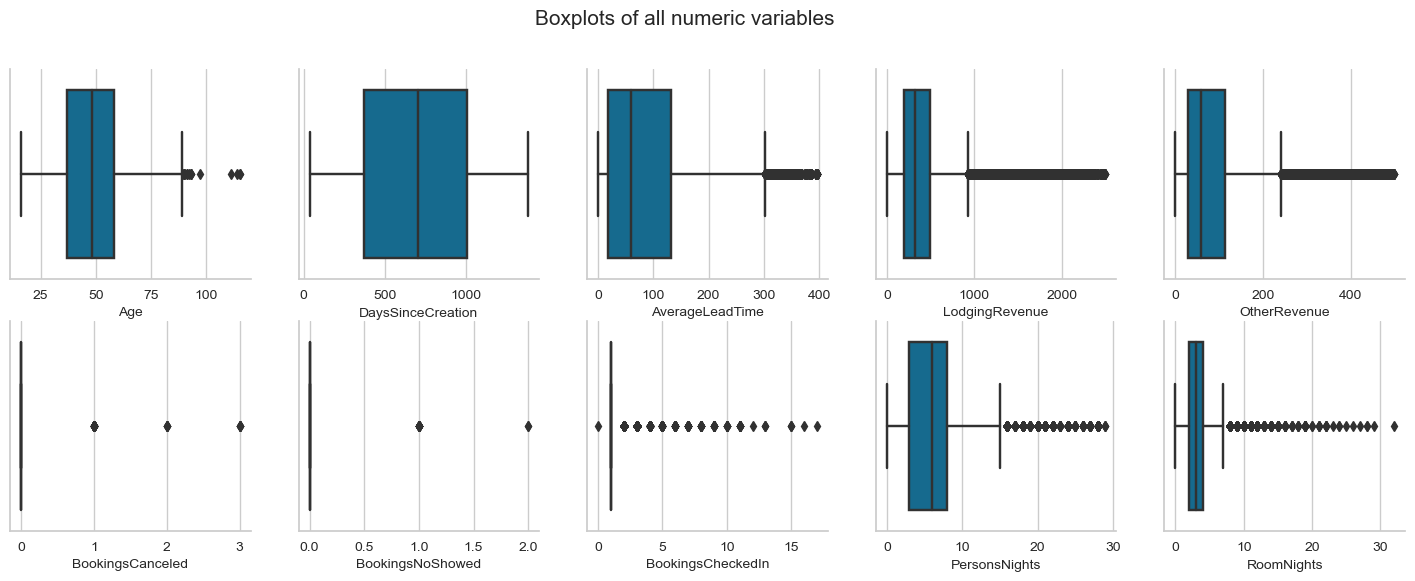

In [48]:
#Create Boxplot Visualizations without outliers

fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(clients_work[numerical], ax.flatten()):
    g = sns.boxplot(data=clients_work,x=var,ax=subplot)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Boxplots of all numeric variables", fontsize=15);

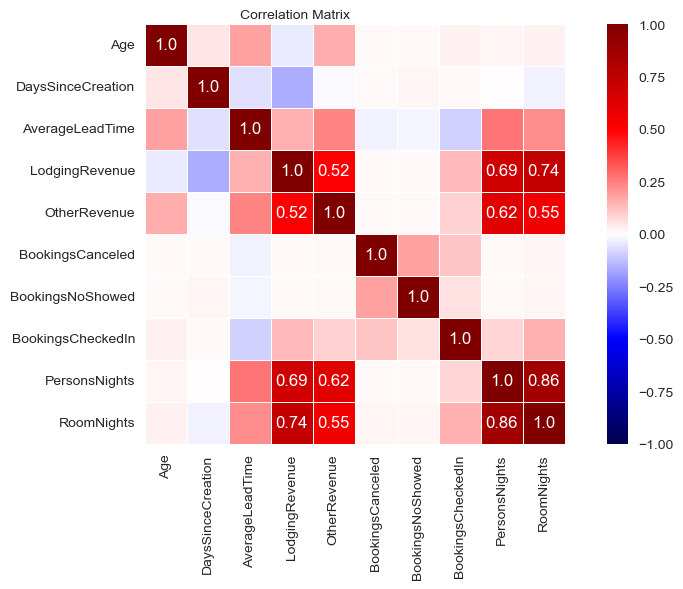

C:\Users\Francisco\AppData\Local\Temp\ipykernel_4964\4203993152.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_work.drop(columns=highly_correlated, inplace=True)


In [49]:
# 4. Remove Features highly correlated 
# 'PersonNights' and 'RoomNights' are very correlated (0.92). So we can remove one of this variables (beacuse we can explain
# the behavior of one variables with the other variables). Since 'PersonNights' is less correlated with the other variables
# we will discard 'RoomNights'

#CORRELATION MATRIX

fig = plt.figure(figsize = (11, 5))
corr = np.round(clients_work[numerical].corr(method='spearman'),2)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))
sns.heatmap(data = corr, annot = annot, cmap = plt.cm.seismic, fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, 
             linewidths = 0.5)
fig.subplots_adjust(top = 0.95)
fig.suptitle("Correlation Matrix", fontsize = 10)
plt.show()

highly_correlated=['RoomNights']
clients_work.drop(columns=highly_correlated, inplace=True)

In [50]:
#5. Function that does one-hot encoding for categories above a threshold and create
#  a dummy column for all others named "Other
# We will use this function to encode 2 categories ('Nationality' and 'DistribuitonChannel')
def one_hot(s, threshold,prefix):
    """Do one-hot encoding for categories above a threshold and create a dummy column for all others named "Other"

    Args:
        s (series): series to apply the transformation
        threshold (numerical): threshold above which a dummy column should be created (from 0 to 1, corresponding from 0 to 100%)
        prefix (string): prefix to assign to the created columns

    Returns:
        dataframe: dataframe with the applied transformations 
    """
    # Check dummies for the column
    d = pd.get_dummies(s)

    # Check if percentage is below threshold and act accordingly
    f = pd.value_counts(s, sort=False, normalize=True) < threshold
    if f.sum() == 0:
        newSeries=d
    else:
        newSeries=d.loc[:, ~f].join(d.loc[:, f].sum(1).rename('Other'))
    # Add the prefix and return the result    
    newSeries=newSeries.add_prefix(prefix)
    return newSeries

In [51]:
# One hot encoding of all categories above 10% - all others categories to "Other"
# One Hot enconding of our categorical variables 'Nationality' and 'DistribuitonChannel'
categorical= ['Nationality', 'DistributionChannel']
for i in range(len(categorical)):
    colToProcess = clients_work[categorical[i]].astype(str)
    procDF = one_hot(colToProcess, .10,categorical[i]+'_')
    clients_work.drop(columns=categorical[i], inplace=True)
    clients_work = pd.concat([clients_work, procDF], axis=1)

C:\Users\Francisco\AppData\Local\Temp\ipykernel_4964\2453969913.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_work.drop(columns=categorical[i], inplace=True)


In [52]:
# 6. Get a copy of the dataframe before normalization for results' analysis
dataset_final_beforeNorm = clients_work.copy()

In [53]:
# 7. Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
clients_work = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(clients_work.values), columns=clients_work.columns,index=clients_work.index)

### Final Dataset
Dataset ready to preform Modeling Stage

In [54]:
dataset_final=clients_work.copy()

In [55]:
# Check dataframe structure and statistics after all transformations
print(dataset_final.shape)
dataset_final.describe(include='all').T

(69702, 19)


,count,mean,std,min,25%,50%,75%,max
Age,69702.0,0.324363,0.149037,0.0,0.212121,0.323232,0.424242,1.0
DaysSinceCreation,69702.0,0.482181,0.279496,0.0,0.249259,0.494440,0.722016,1.0
AverageLeadTime,69702.0,0.214175,0.205354,0.0,0.046086,0.148990,0.333333,1.0
LodgingRevenue,69702.0,0.159130,0.122348,0.0,0.080032,0.127731,0.196879,1.0
OtherRevenue,69702.0,0.168751,0.162096,0.0,0.056112,0.118487,0.227455,1.0
BookingsCanceled,69702.0,0.000406,0.014555,0.0,0.000000,0.000000,0.000000,1.0
BookingsNoShowed,69702.0,0.000172,0.010020,0.0,0.000000,0.000000,0.000000,1.0
BookingsCheckedIn,69702.0,0.062682,0.024654,0.0,0.058824,0.058824,0.058824,1.0
PersonsNights,69702.0,0.216527,0.140146,0.0,0.103448,0.206897,0.275862,1.0
SRKingSizeBed,69702.0,0.354366,0.478324,0.0,0.000000,0.000000,1.000000,1.0


<a class="anchor" id="5">

# 5. Modelling
    
</a>

<a class="anchor" id="5.1">

## 5.1. Principal Component Analysis
    
</a>

(69702, 2)


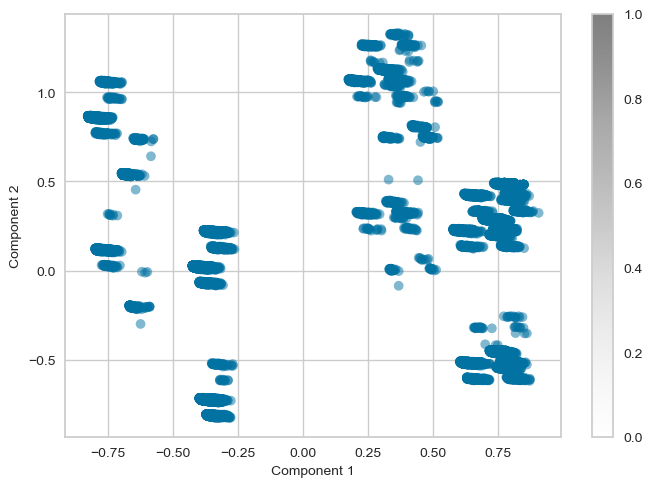

In [56]:
# Let's use PCA to visualize with only two components
pca2 = PCA(n_components = 2)
pca2.fit(dataset_final)
X_pca2 = pca2.transform(dataset_final)
print(X_pca2.shape)

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1],  edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [57]:
# Fit the PCA algorithm to data 
pca = PCA().fit(dataset_final)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(dataset_final.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.219588,0.219588
1,2,0.181514,0.401102
2,3,0.146100,0.547202
3,4,0.097061,0.644263
4,5,0.077700,0.721964
5,6,0.067755,0.789719
6,7,0.050995,0.840714
7,8,0.049744,0.890458
8,9,0.033394,0.923852
9,10,0.028365,0.952217


Text(0.5, 1.0, 'Explained variance by components')

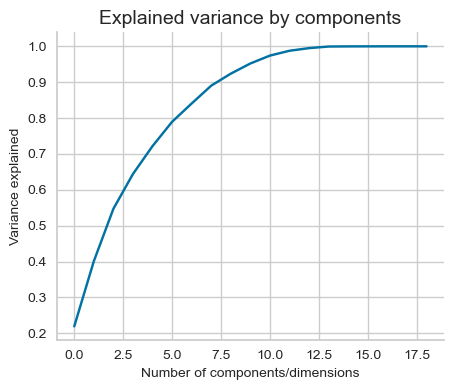

In [58]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.title('Explained variance by components', fontsize=plots_Title_fontSize)

With 11 components is possible to explain 98.9% of the total variance.

<a class="anchor" id="5.2">

## 5.2. K-Means
    
</a>

In [59]:
# Apply the dimension reduction to the dataset (for 11 components)
pca_reduced = PCA(n_components = 11)
pca_reduced.fit(dataset_final)
X_pca_reduced = pca_reduced.transform(dataset_final) 
print(X_pca_reduced.shape)

(69702, 11)


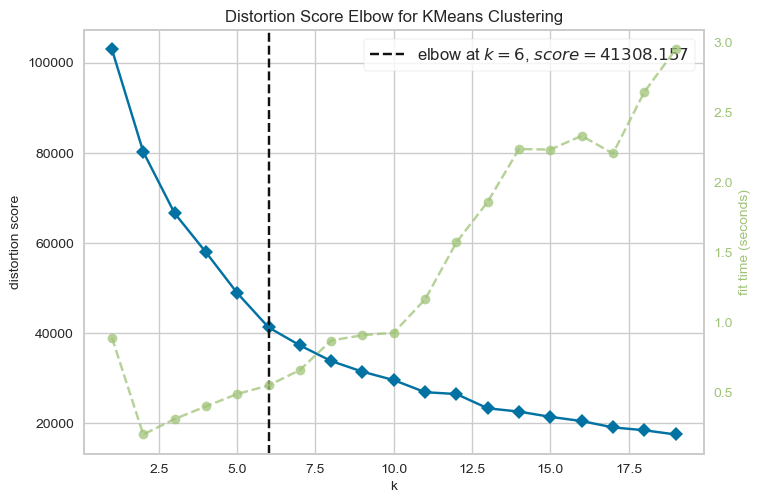

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(X_pca_reduced)
visualizer.show() 

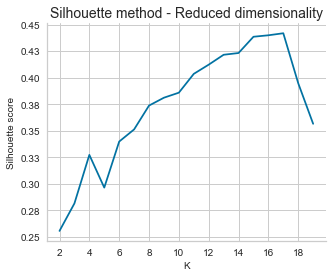

In [61]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 20 minutes)
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 20):
  km = KMeans(n_clusters = k, random_state=123).fit(dataset_final)
  labels = km.labels_
  sil.append(silhouette_score(dataset_final, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 20), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=plots_Title_fontSize);

The Elbow method indicates K should be 6, but the Silhouette method points to higher values such as 17. However, since large number of clusters are not very helpful for marketing pruposes, let's select K as 6

In [60]:
# Apply the K-Means for K=6
K=6
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

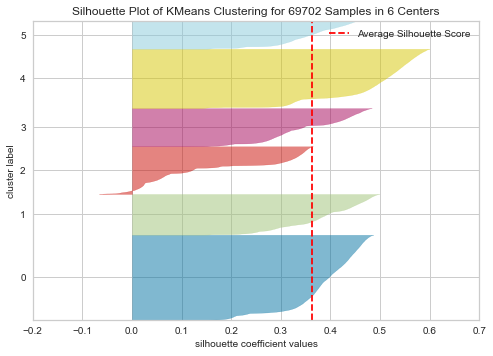

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 69702 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca_reduced)
visualizer.show()

<a class="anchor" id="5.3">

## 5.3. Cluster Profiling
    
</a>

<a class="anchor" id="5.3.1">

## 5.3.1 General Profiling
    
</a>

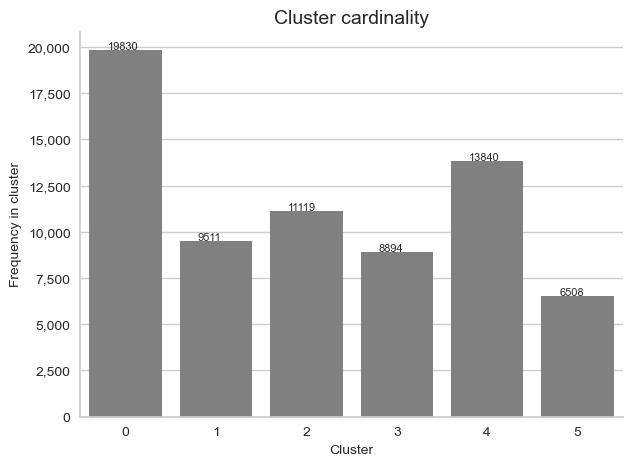

In [61]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = dataset_final_beforeNorm.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

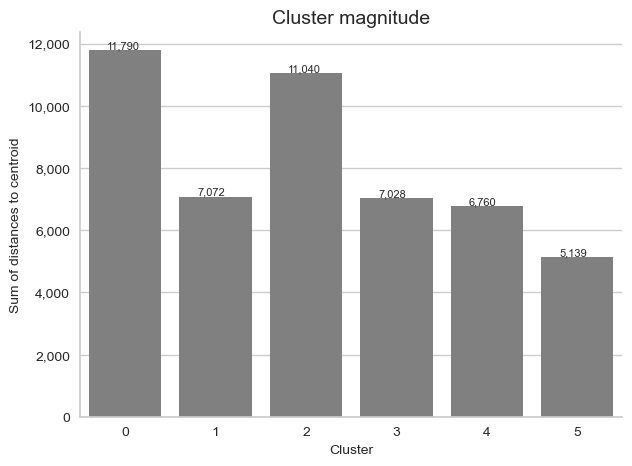

In [62]:
# Plot clusters magnitude

# Compute Magnitude
dataset_final['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = dataset_final['distanceToCentroid'].groupby(y_kmeans).sum()
dataset_final = dataset_final.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

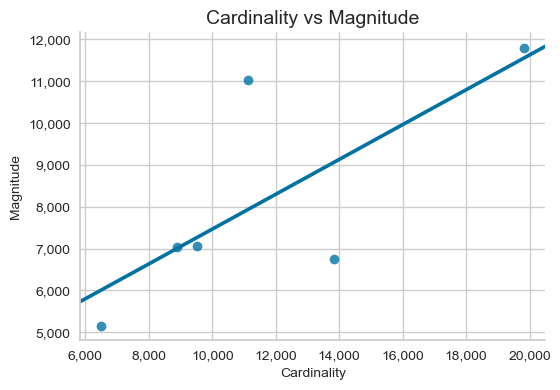

In [63]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Cardinality is somehow correlated to magnitude, therefore no major anomalies seems to exist in clusters.

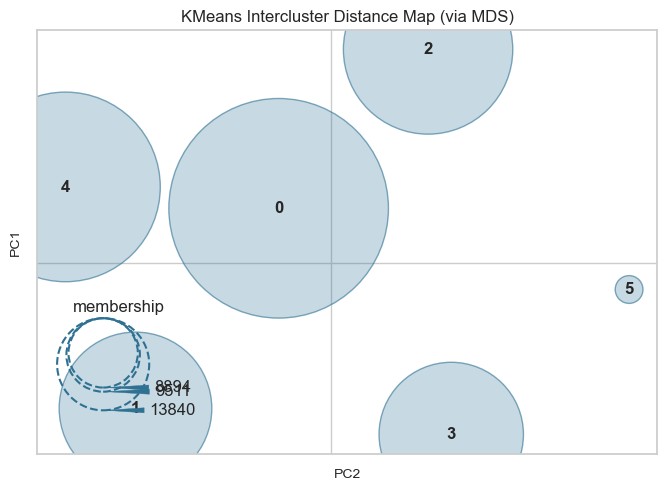

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [64]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca_reduced)
visualizer.show()

Circles represent the clusters (0 to 5). Even at two dimensions it is possible to see that although the two components only represent around 39% of the variance, some distance between clusters seems to exist.

In [65]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=dataset_final.columns)
wheightsDF

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,SRKingSizeBed,SRTwinBed,SRQuietRoom,Nationality_DEU,Nationality_FRA,Nationality_GBR,Nationality_Other,DistributionChannel_Direct,DistributionChannel_Travel Agent/Operator,DistributionChannel_Other
0,1.937850e-02,4.207106e-03,8.039441e-02,-7.050436e-04,2.613383e-02,-7.072970e-04,-3.077115e-04,-3.798506e-03,2.051059e-02,2.706174e-02,4.335208e-02,2.351526e-02,0.295843,0.338627,0.183376,-0.817846,-0.176912,0.224879,-0.047966
1,3.328427e-03,-1.263019e-02,-6.668615e-03,1.287460e-04,1.164277e-03,4.210701e-04,2.593242e-04,2.937450e-03,-1.503443e-02,-7.434345e-01,1.974480e-01,-9.039168e-02,0.097550,0.038016,0.035125,-0.170691,0.386293,-0.452505,0.066212
2,-2.757140e-02,-2.554957e-02,-7.152309e-02,1.656361e-02,1.442312e-02,8.179685e-04,1.628662e-04,3.445555e-03,1.042021e-02,5.054804e-01,-3.916591e-01,-2.316999e-03,-0.088423,0.215036,0.060480,-0.187093,0.473641,-0.514967,0.041326
3,4.333615e-02,-1.266769e-01,1.218249e-01,1.016783e-02,-1.179835e-03,-7.793387e-06,-4.612818e-06,2.581949e-04,-3.710780e-04,1.928930e-01,2.920523e-02,3.080113e-02,0.618137,-0.704381,0.151679,-0.065435,0.104370,-0.108069,0.003699
4,-2.429398e-02,-7.716152e-02,1.211733e-02,1.770649e-02,-3.467216e-06,-1.977629e-04,-1.057573e-04,-5.687191e-04,4.404753e-03,8.107258e-02,3.070901e-01,-1.214760e-02,-0.492924,-0.204329,0.774889,-0.077636,0.022311,-0.011632,-0.010679
5,1.466094e-02,-2.512041e-01,9.017267e-02,5.439165e-02,7.774103e-02,-3.080631e-04,-2.053760e-04,-2.087119e-03,5.502501e-02,3.102988e-01,7.679984e-01,2.467981e-01,0.040668,0.200162,-0.284864,0.044034,0.172156,-0.096996,-0.075160
6,-6.888373e-03,-2.228346e-01,-6.663710e-03,6.193065e-02,2.427479e-02,-4.523332e-04,-2.462543e-04,-3.817488e-05,3.264014e-02,-1.967340e-01,-2.585193e-01,9.106791e-01,-0.054182,-0.020750,0.073588,0.001344,0.001089,0.022956,-0.024046
7,4.542516e-02,9.206593e-01,-3.366596e-02,-4.843109e-02,-8.927110e-03,9.566467e-04,6.200779e-04,2.503103e-03,-2.913803e-03,8.215241e-02,1.833827e-01,3.004834e-01,0.045066,-0.059194,0.027511,-0.013383,0.054122,-0.078125,0.024003
8,-1.126013e-01,-1.011501e-01,-4.235480e-01,-1.777773e-01,-3.422392e-01,2.322257e-03,1.358414e-03,4.642547e-03,-3.074881e-01,7.311064e-02,1.304428e-01,8.285767e-02,0.058407,0.007660,-0.011112,-0.054955,-0.345889,-0.238813,0.584702
9,1.458943e-01,2.642751e-02,4.403326e-01,2.348310e-01,4.135769e-01,4.352424e-03,2.337987e-03,2.090075e-02,2.970686e-01,6.702408e-03,-3.644287e-02,-1.684146e-02,-0.051341,0.028281,-0.002856,0.025916,-0.312090,-0.242295,0.554385


In [66]:
# Study the weights of component 15
comp = abs(wheightsDF.iloc[14])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

BookingsCheckedIn                            0.969147
BookingsCanceled                             0.229595
BookingsNoShowed                             0.081271
LodgingRevenue                               0.026122
PersonsNights                                0.015461
DistributionChannel_Other                    0.015217
DistributionChannel_Travel Agent/Operator    0.009597
AverageLeadTime                              0.008741
Age                                          0.007591
DistributionChannel_Direct                   0.005621
DaysSinceCreation                            0.003563
OtherRevenue                                 0.001884
SRQuietRoom                                  0.001568
Nationality_Other                            0.001462
SRTwinBed                                    0.001366
Nationality_FRA                              0.001364
SRKingSizeBed                                0.000545
Nationality_GBR                              0.000129
Nationality_DEU             

In [69]:
# Print the dataframe with each row assigned to the respective cluster
dataset_final_with_cluster = dataset_final.copy()
dataset_final_with_cluster['ClusterNumber'] = y_kmeans
dataset_final_with_cluster

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,SRKingSizeBed,SRTwinBed,SRQuietRoom,Nationality_DEU,Nationality_FRA,Nationality_GBR,Nationality_Other,DistributionChannel_Direct,DistributionChannel_Travel Agent/Operator,DistributionChannel_Other,ClusterNumber
0,0.444444,0.329133,0.161616,0.198079,0.324649,0.0,0.0,0.117647,0.206897,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,0.383838,0.860638,0.035354,0.278111,0.200401,0.0,0.0,0.058824,0.344828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,0.373737,0.532987,0.141414,0.066026,0.024048,0.0,0.0,0.058824,0.103448,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,0.171717,0.472202,0.005051,0.094838,0.143487,0.0,0.0,0.058824,0.103448,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,0.151515,0.042995,0.452020,0.067227,0.132265,0.0,0.0,0.058824,0.068966,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71824,0.060606,0.091179,0.174242,0.084834,0.064128,0.0,0.0,0.058824,0.137931,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
71825,0.383838,0.128243,0.209596,0.102641,0.149098,0.0,0.0,0.058824,0.206897,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
71826,0.252525,0.553744,0.146465,0.087235,0.028056,0.0,0.0,0.058824,0.068966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
71827,0.030303,0.007413,0.224747,0.364826,0.062124,0.0,0.0,0.058824,0.482759,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [106]:
#Make a copy of the dataset to use in cluster analysis and in the respective visualization
df_visualization = dataset_final_with_cluster.copy()
df_cluster_analysis = df_visualization.copy()

In [143]:
# Create a function to better understand the cluster profiles

def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=33)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

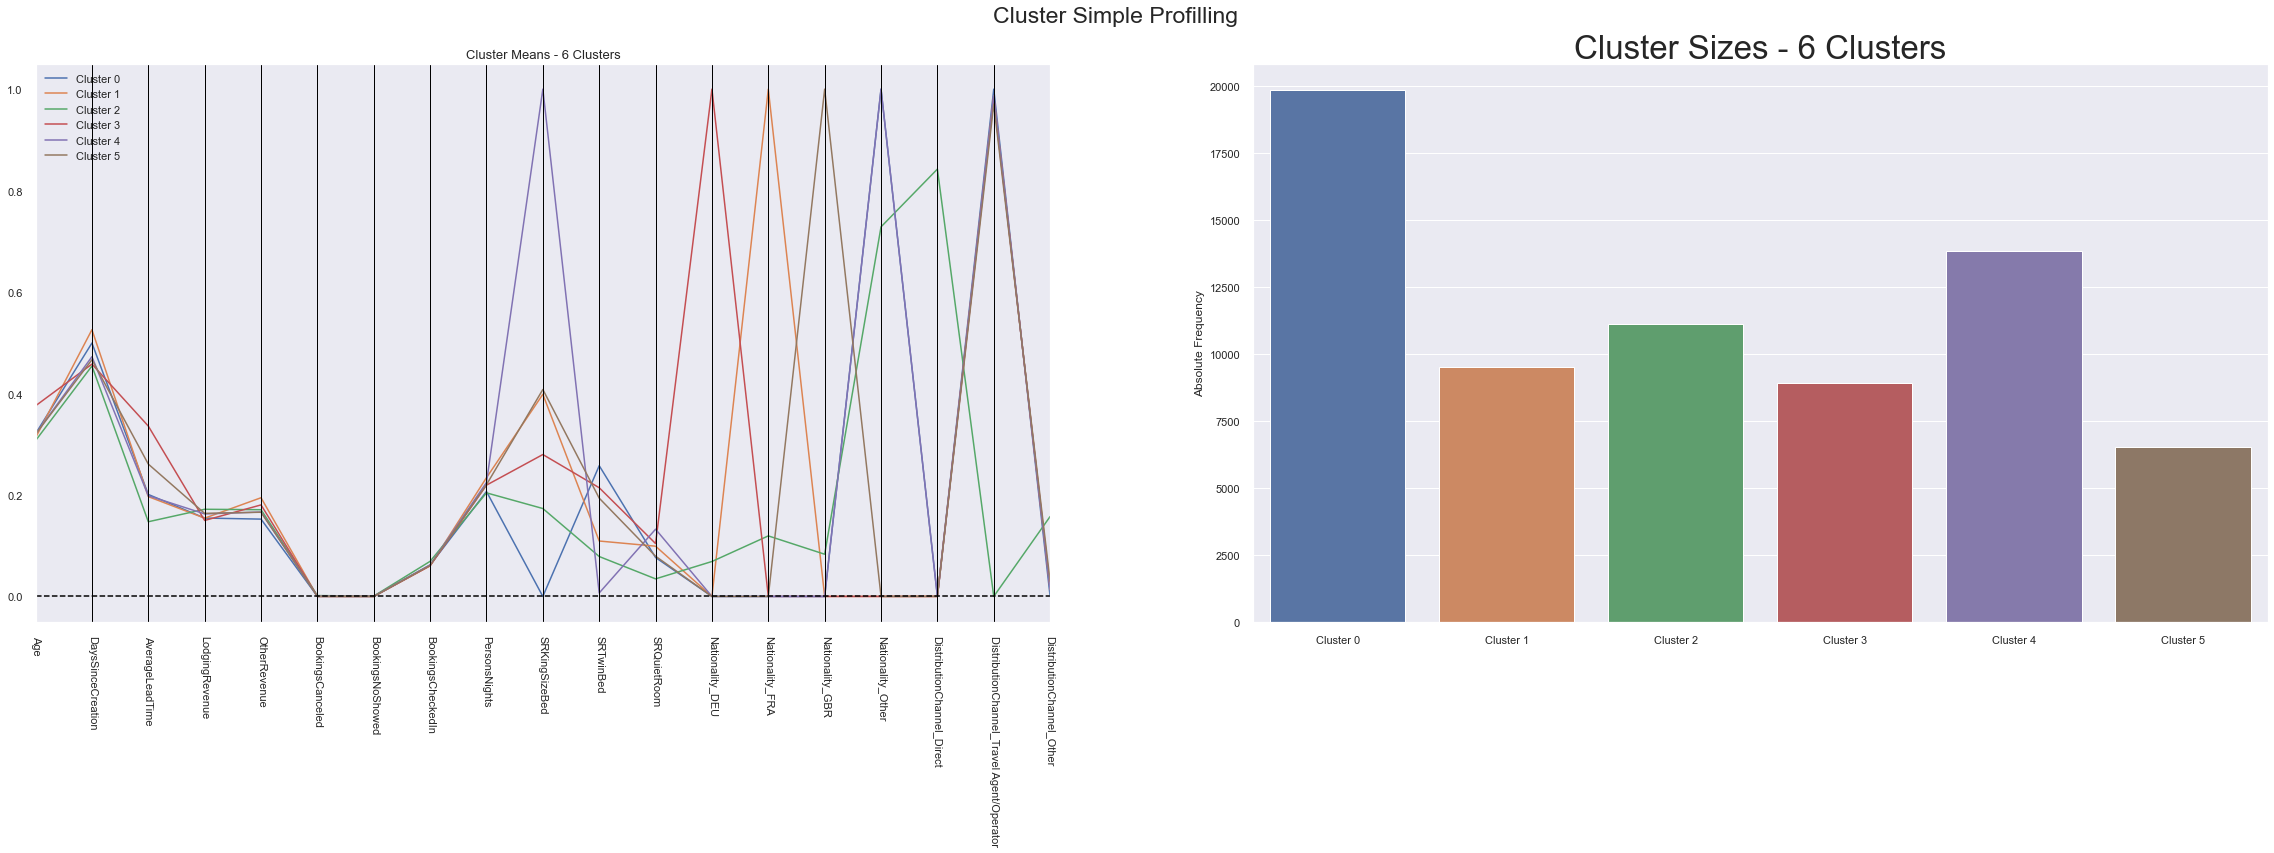

In [145]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_cluster_analysis, 
    label_columns = ['ClusterNumber'], 
    figsize = (40, 10)
)

<a class="anchor" id="5.3.2">

## 5.3.2 Using t-SNE
    
</a>

In [97]:
df_tsne = dataset_final_with_cluster.copy()

In [101]:
df_tsne[top_features]

,BookingsCheckedIn,BookingsCanceled,BookingsNoShowed,LodgingRevenue,PersonsNights,DistributionChannel_Other,DistributionChannel_Travel Agent/Operator,AverageLeadTime,Age,DistributionChannel_Direct,DaysSinceCreation,OtherRevenue,SRQuietRoom,Nationality_Other,SRTwinBed,Nationality_FRA,SRKingSizeBed,Nationality_GBR,Nationality_DEU
0,0.117647,0.0,0.0,0.198079,0.206897,0.0,0.0,0.161616,0.444444,1.0,0.329133,0.324649,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.058824,0.0,0.0,0.278111,0.344828,0.0,1.0,0.035354,0.383838,0.0,0.860638,0.200401,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.058824,0.0,0.0,0.066026,0.103448,0.0,1.0,0.141414,0.373737,0.0,0.532987,0.024048,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.058824,0.0,0.0,0.094838,0.103448,0.0,1.0,0.005051,0.171717,0.0,0.472202,0.143487,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.058824,0.0,0.0,0.067227,0.068966,0.0,1.0,0.452020,0.151515,0.0,0.042995,0.132265,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71824,0.058824,0.0,0.0,0.084834,0.137931,0.0,1.0,0.174242,0.060606,0.0,0.091179,0.064128,0.0,1.0,1.0,0.0,0.0,0.0,0.0
71825,0.058824,0.0,0.0,0.102641,0.206897,0.0,1.0,0.209596,0.383838,0.0,0.128243,0.149098,0.0,1.0,1.0,0.0,0.0,0.0,0.0
71826,0.058824,0.0,0.0,0.087235,0.068966,0.0,0.0,0.146465,0.252525,1.0,0.553744,0.028056,0.0,1.0,0.0,0.0,0.0,0.0,0.0
71827,0.058824,0.0,0.0,0.364826,0.482759,0.0,1.0,0.224747,0.030303,0.0,0.007413,0.062124,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [99]:
two_dim = TSNE(random_state=42).fit_transform(df_tsne[top_features])

C:\Users\Utente\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Utente\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



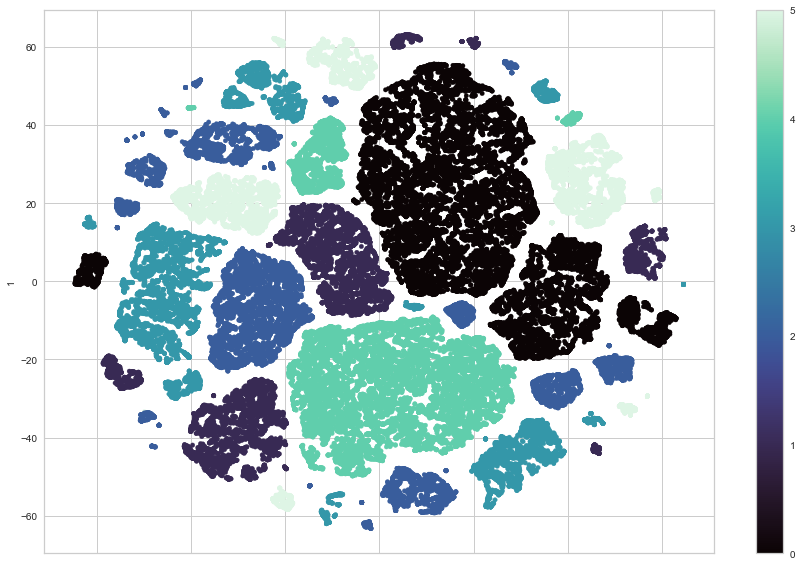

In [100]:
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_tsne['ClusterNumber'], colormap='mako', figsize=(15,10))
plt.show()

<a class="anchor" id="5.3.3">

## 5.3.3 Using Polar Line Plot
    
</a>

In [107]:
# Adapted from: https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a
clusters = df_visualization[top_features].copy()
clusters['label']= df_visualization['ClusterNumber']
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=500,width=700)
fig4.show()

C:\Users\Utente\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Utente\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Utente\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Utente\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Utente\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu


<a class="anchor" id="6">

# 6. Evaluation
    
</a>

<a class="anchor" id="6.1">

## 6.1. Interpret Clusters Results
    
</a>

In [67]:
# Check the mean values of each cluster for top 15 relevant features
top_features = comp[:21].index
clustersMeanDF = pd.DataFrame(dataset_final_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=dataset_final_beforeNorm.columns)
clustersMeanDF.transpose()

,0,1,2,3,4,5
Age,47.763667,46.971612,46.416199,53.205869,47.693558,47.665028
DaysSinceCreation,709.844781,745.336347,648.840363,653.841803,673.570665,665.452981
AverageLeadTime,79.612405,77.921565,58.304614,133.005060,78.622254,103.330209
LodgingRevenue,386.092496,385.655560,429.422600,374.306086,406.577713,409.202872
OtherRevenue,76.059707,97.091344,85.310886,90.033257,83.033884,82.844020
BookingsCanceled,0.000403,0.000526,0.005126,0.000000,0.001012,0.000154
BookingsNoShowed,0.000202,0.000000,0.001349,0.000112,0.000289,0.000000
BookingsCheckedIn,1.053959,1.026706,1.176814,1.027772,1.055780,1.040412
PersonsNights,5.998437,6.789612,5.921576,6.362492,6.512861,6.389982
SRKingSizeBed,0.000000,0.398486,0.173307,0.279739,1.000000,0.407959


#### Some insights:

**Cluster 0**: RESUME
* Biggest Cluster with almost 20,000 people
* People from other countries than Deutchland, France and Great Britain
* 100 % comes from Travel Agent/Operator
* 25 % asks for TwinBed
* Clients that spend less in 'OtherRevenue' (average 76 euros)


**Cluster 1**: RESUME
* People that have created an account for a long time with an average of 2 years from now (745 days)
* Clients that spend less in 'Lodging Revenue' (average 385 euros)
* Clients that spend most in 'OtherRevenue' (average 97 euros)
* 40 % asks for King Size Bed
* 100% Clients are from France
* 98% comes from Travel Agent/Operator


**Cluster 2**: RESUME
* Most Recent Clients (average 648 days)
* Clients that make their reservation more close to the date (58 days)
* Clients that spend the most in Lodging Revenue (average 429 euros)
* 84 % Clients book directly from the Hotel
* Although there´s no big difference between clusters, these customers are the youngest ones.


**Cluster 3**: RESUME
* Oldest Clients (average 53 years)
* People that made the earliest reservation to book the hotel (average 133 days)
* People from Deutchland
* 98% comes from Travel Agent/Operator

**Cluster 4**: RESUME
* 100% Clients asks for King Bed Size
* 13% asks for Quiet Romm (highest percentage)
* People from other countries than Deutchland, France and Great Britain
* 98% comes from Travel Agent/Operator


**Cluster 5**: RESUME
* Smallest Cluster with only 6508 people
* 2 type of Clients that spends most 
* 40% asks for a King Size Bed
* People from Great Britain
* 97% comes from Travel Agent/Operator

<a class="anchor" id="6.2">

## 6.2. Data/Cluster Visualization
    
</a>

- Trying to interpret some properties of our final clusters with some Visualizations.
- Can be helpful to have a better understanding of our customers

In [68]:
#Create a dataset for Visualization
dataset_visualization=dataset_final_beforeNorm.copy()

In [71]:
#Functions that Transforms encoded Categorical Variables into just 1 Variable 
def Nationality(df):
    df.loc[(df['Nationality_DEU'] ==1) ,'Nationality'] = 'DEU'
    df.loc[(df['Nationality_FRA'] ==1) ,'Nationality'] = 'FRA'
    df.loc[(df['Nationality_GBR'] ==1) ,'Nationality'] = 'GBR'
    df.loc[(df['Nationality_Other'] ==1) ,'Nationality'] = 'Other'
    df['Nationality']

def DistribuitonChannel(df):
    df.loc[(df['DistributionChannel_Direct'] ==1) ,'DistribuitonChannel'] = 'Direct'
    df.loc[(df['DistributionChannel_Travel Agent/Operator'] ==1) ,'DistribuitonChannel'] = 'Travel Agent/Operator'
    df.loc[(df['DistributionChannel_Other'] ==1) ,'DistribuitonChannel'] = 'Other'
    df['DistribuitonChannel']
    
Nationality(dataset_visualization)
DistribuitonChannel(dataset_visualization)

In [72]:
#Drop encoded Categorical
dataset_visualization.drop(columns=['Nationality_DEU', 'Nationality_FRA','Nationality_GBR',
                                    'Nationality_Other','DistributionChannel_Direct','DistributionChannel_Travel Agent/Operator',
                                   'DistributionChannel_Other'],inplace=True)

In [73]:
#Associate each record to the respective cluster
dataset_visualization['Cluster']=y_kmeans

In [74]:
dataset_visualization

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,SRKingSizeBed,SRTwinBed,SRQuietRoom,Nationality,DistribuitonChannel,Cluster
0,60.0,480.0,64.0,495.0,162.0,0.0,0.0,2.0,6.0,1.0,0.0,1.0,FRA,Direct,2
1,54.0,1197.0,14.0,695.0,100.0,0.0,0.0,1.0,10.0,1.0,0.0,0.0,DEU,Travel Agent/Operator,3
2,53.0,755.0,56.0,165.0,12.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,Other,Travel Agent/Operator,0
3,33.0,673.0,2.0,237.0,71.6,0.0,0.0,1.0,3.0,0.0,0.0,0.0,FRA,Travel Agent/Operator,1
4,31.0,94.0,179.0,168.0,66.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,DEU,Travel Agent/Operator,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71824,22.0,159.0,69.0,212.0,32.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,Other,Travel Agent/Operator,0
71825,54.0,209.0,83.0,256.5,74.4,0.0,0.0,1.0,6.0,0.0,1.0,0.0,Other,Travel Agent/Operator,0
71826,41.0,783.0,58.0,218.0,14.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,Other,Direct,2
71827,19.0,46.0,89.0,911.7,31.0,0.0,0.0,1.0,14.0,1.0,0.0,0.0,FRA,Travel Agent/Operator,1


<a class="anchor" id="6.2.1">

## 6.2.1. Distribuiton Channel related Graphs
</a>

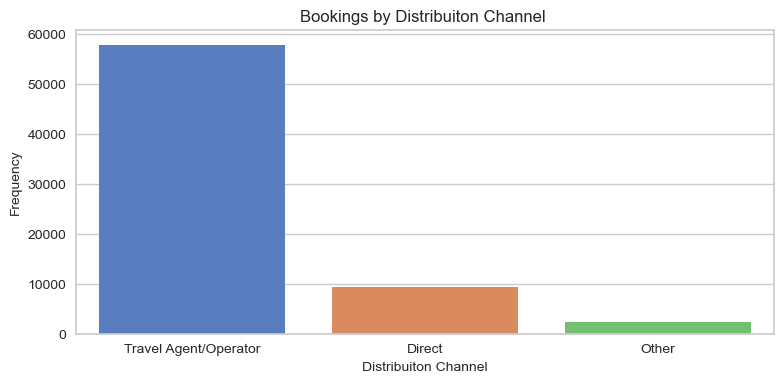

In [360]:
#Count Plot with  Bookings by each Distribuiton Channel
plt.figure(figsize=(8,4))
sns.countplot(x='DistribuitonChannel' ,data=dataset_visualization ,order=dataset_visualization['DistribuitonChannel'].value_counts().index,palette='muted')
plt.xlabel('Distribuiton Channel')
plt.ylabel('Frequency')
plt.title('Bookings by Distribuiton Channel ')
plt.tight_layout()

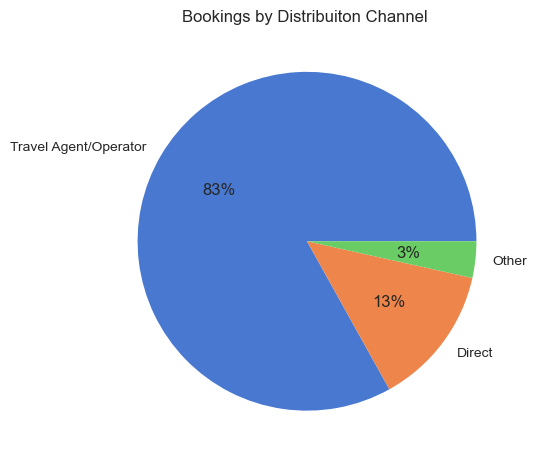

In [478]:
#Pie Chart Distribuiton Channel
Value_Counts=dataset_visualization['DistribuitonChannel'].value_counts()
DistribuitonChannel_Visualization = pd.DataFrame(data=Value_Counts)
DistribuitonChannel_Visualization.reset_index(drop=False,inplace=True)

palette_color = sns.color_palette('muted')
plt.pie(DistribuitonChannel_Visualization['DistribuitonChannel'], labels = DistribuitonChannel_Visualization['index'],colors=palette_color,autopct='%.0f%%')
plt.title('Bookings by Distribuiton Channel ')
plt.show()

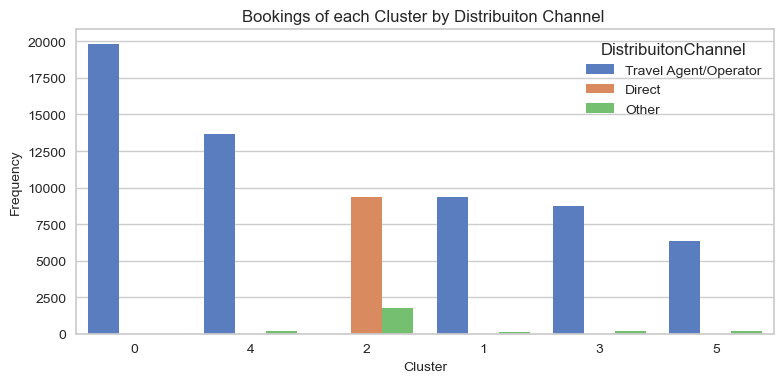

In [359]:
#Count Plot with Bookings by Distibuiton Channel and Clusters
plt.figure(figsize=(8,4))
sns.countplot(x='Cluster',hue='DistribuitonChannel' ,data=dataset_visualization,
              order=dataset_visualization['Cluster'].value_counts().index[::1],
              hue_order=dataset_visualization['DistribuitonChannel'].value_counts().index[::1], palette='muted'
             )
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Bookings of each Cluster by Distribuiton Channel ')
plt.tight_layout()

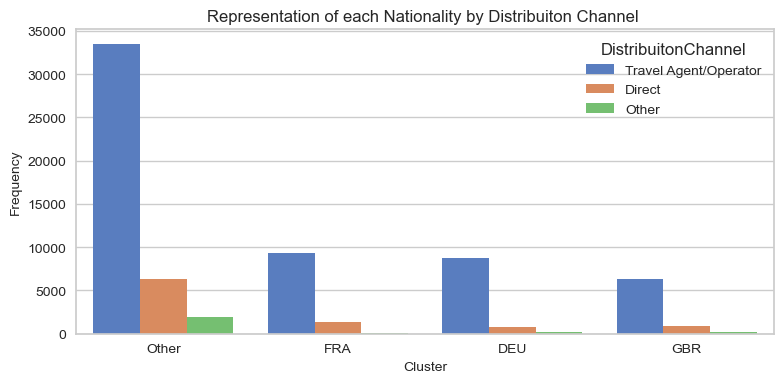

In [358]:
#Count Plot with Bookings by Distribuiton Channel and Nationality
plt.figure(figsize=(8,4))
sns.countplot(x='Nationality',hue='DistribuitonChannel' ,data=dataset_visualization,
             order=dataset_visualization['Nationality'].value_counts().index[::1],
              hue_order=dataset_visualization['DistribuitonChannel'].value_counts().index[::1], palette='muted')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Representation of each Nationality by Distribuiton Channel ')
plt.tight_layout()

#### Nationality and Cluster Graphs

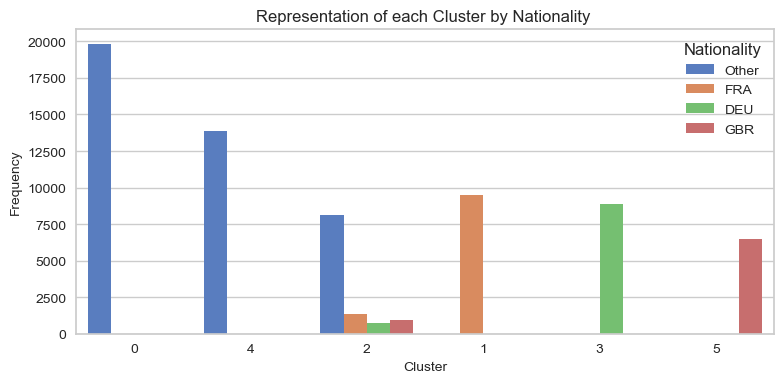

In [357]:
#Count Plot that shows the presence of each Nationality in each Cluster
plt.figure(figsize=(8,4))
sns.countplot(x='Cluster',hue='Nationality' ,data=dataset_visualization,order=dataset_visualization['Cluster'].value_counts().index[::1],
              hue_order=dataset_visualization['Nationality'].value_counts().index[::1], palette='muted')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Representation of each Cluster by Nationality ')
plt.tight_layout()

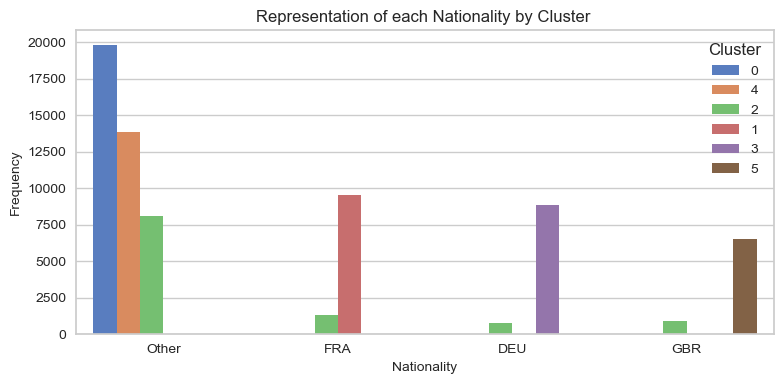

In [356]:
#Count Plot that shows the presence of each Nationality in each Cluster
plt.figure(figsize=(8,4))
sns.countplot(x='Nationality',hue='Cluster' ,data=dataset_visualization, order=dataset_visualization['Nationality'].value_counts().index[::1],
              hue_order=dataset_visualization['Cluster'].value_counts().index[::1], palette='muted')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.title('Representation of each Nationality by Cluster ')
plt.tight_layout()

<a class="anchor" id="6.2.2">

## 6.2.2 Nationality Related Graphs
</a>

##### Revenue

In [220]:
Revenue_Nat=dataset_visualization[['LodgingRevenue','OtherRevenue','Nationality','AverageLeadTime','DaysSinceCreation']].groupby('Nationality').sum()
Revenue_Nat.reset_index(inplace=True)
Revenue_Nat['Total_Revenue']=Revenue_Nat['LodgingRevenue']+Revenue_Nat['OtherRevenue']
Revenue_Nat.set_index('Nationality',drop=False,inplace=True)
Revenue_Nat['Frequency']=dataset_visualization['Nationality'].value_counts()
Revenue_Nat['Avr_Lodging Revenue']=Revenue_Nat['LodgingRevenue']/Revenue_Nat['Frequency']
Revenue_Nat['Avr_Other Revenue']=Revenue_Nat['OtherRevenue']/Revenue_Nat['Frequency']
Revenue_Nat['Avr_Total Revenue']=Revenue_Nat['Total_Revenue']/Revenue_Nat['Frequency']
Revenue_Nat['Avr_LeadTime']=Revenue_Nat['AverageLeadTime']/Revenue_Nat['Frequency']
Revenue_Nat['Avr_DaysSinceCreation']=Revenue_Nat['DaysSinceCreation']/Revenue_Nat['Frequency']

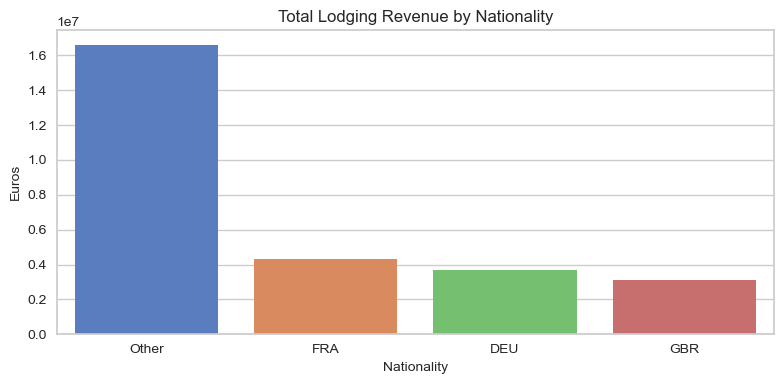

In [344]:
#Total 'LodgingRevenue' that the hotel Received by Nationality
plt.figure(figsize=(8,4))
sns.barplot(x="Nationality", y="LodgingRevenue",data=Revenue_Nat,order=Revenue_Nat.sort_values("LodgingRevenue",ascending=False).Nationality,palette='muted')
plt.xlabel('Nationality')
plt.ylabel('Euros')
plt.title('Total Lodging Revenue by Nationality')
plt.tight_layout()

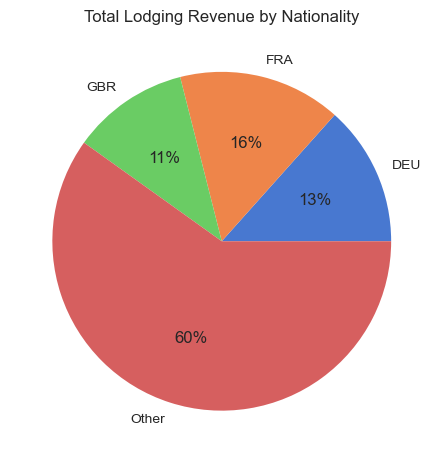

In [476]:
#Total 'LodgingRevenue' that the hotel Received by Nationality
palette_color = sns.color_palette('muted')
plt.pie(Revenue_Nat['LodgingRevenue'], labels = Revenue_Nat['Nationality'],colors=palette_color,autopct='%.0f%%')
plt.title('Total Lodging Revenue by Nationality')
plt.show()

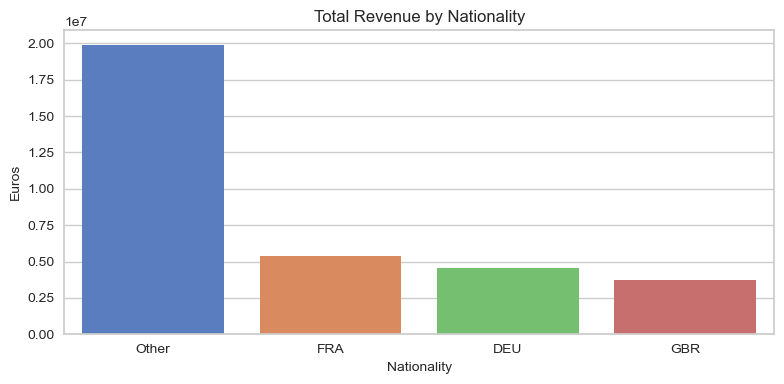

In [343]:
#Total Revenue that the hotel Received by Nationality
plt.figure(figsize=(8,4))
sns.barplot(x="Nationality", y="Total_Revenue",data=Revenue_Nat,order=Revenue_Nat.sort_values("Total_Revenue",ascending=False).Nationality,palette='muted')
plt.xlabel('Nationality')
plt.ylabel('Euros')
plt.title('Total Revenue by Nationality')
plt.tight_layout()

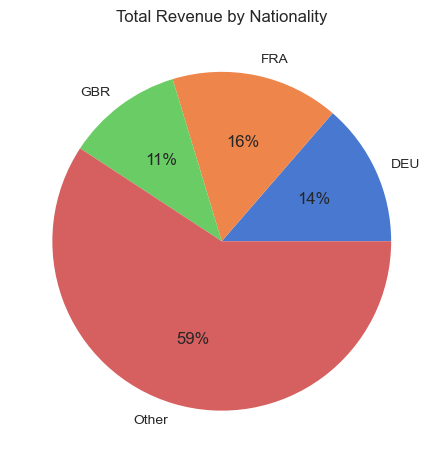

In [477]:
#Total 'Total_Revenue' that the hotel Received by Nationality
palette_color = sns.color_palette('muted')
plt.pie(Revenue_Nat['Total_Revenue'], labels = Revenue_Nat['Nationality'],colors=palette_color,autopct='%.0f%%')
plt.title('Total Revenue by Nationality')
plt.show()

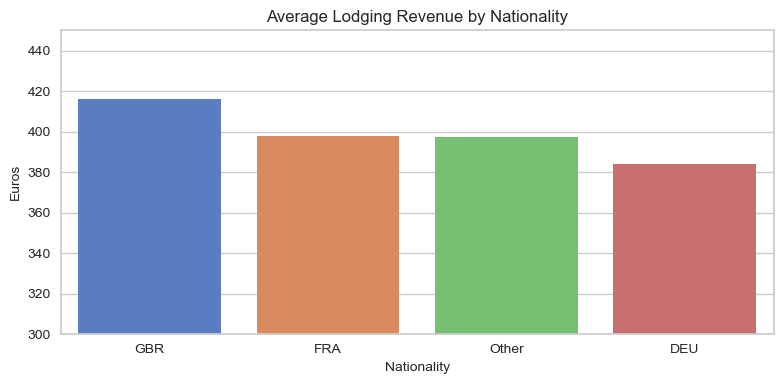

In [342]:
#Average Lodging Revenue by Nationality
plt.figure(figsize=(8,4))
sns.barplot(x="Nationality", y="Avr_Lodging Revenue",data=Revenue_Nat,order=Revenue_Nat.sort_values("Avr_Lodging Revenue",ascending=False).Nationality,palette='muted')
plt.xlabel('Nationality')
plt.ylabel('Euros')
plt.title('Average Lodging Revenue by Nationality')
plt.ylim(300,450)
plt.tight_layout()

##### Days Since Creation

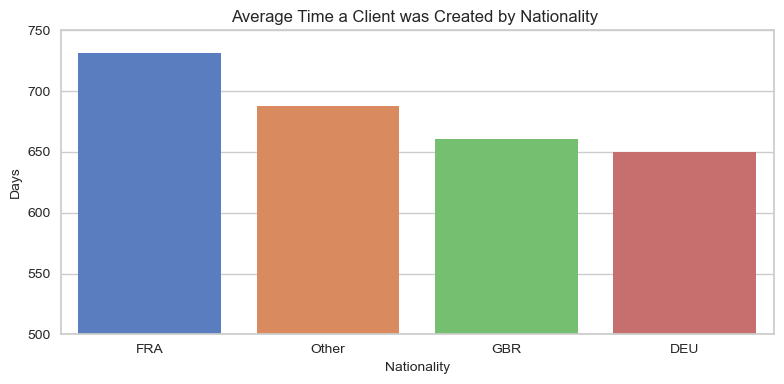

In [341]:
#Average Number of days Since Creation By Nationality
plt.figure(figsize=(8,4))
sns.barplot(x="Nationality", y="Avr_DaysSinceCreation",data=Revenue_Nat,order=Revenue_Nat.sort_values("Avr_DaysSinceCreation",ascending=False).Nationality,palette='muted')
plt.xlabel('Nationality')
plt.ylabel('Days')
plt.title('Average Time a Client was Created by Nationality ')
plt.ylim(500,750)
plt.tight_layout()

#### AverageLeadTime

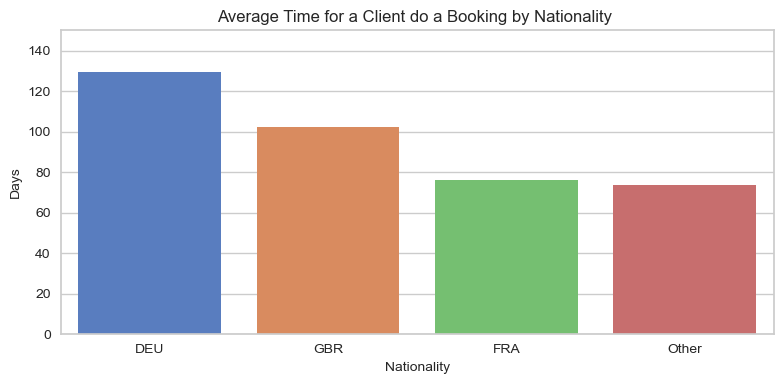

In [340]:
#Average Lead Time 
plt.figure(figsize=(8,4))
sns.barplot(x="Nationality", y="Avr_LeadTime",data=Revenue_Nat,order=Revenue_Nat.sort_values("Avr_LeadTime",ascending=False).Nationality,palette='muted')
plt.xlabel('Nationality')
plt.ylabel('Days')
plt.title('Average Time for a Client do a Booking by Nationality ')
plt.ylim(0,150)
plt.tight_layout()

<a class="anchor" id="6.2.3">

## 6.2.3. Cluster related Graphs
</a>

In [232]:
dataset_cluster=dataset_visualization[['LodgingRevenue','OtherRevenue','Cluster','AverageLeadTime','DaysSinceCreation']].groupby('Cluster').sum()
dataset_cluster.reset_index(inplace=True)
dataset_cluster['Total_Revenue']=dataset_cluster['LodgingRevenue']+dataset_cluster['OtherRevenue']
dataset_cluster.set_index('Cluster',drop=False,inplace=True)
dataset_cluster['Frequency']=dataset_visualization['Cluster'].value_counts()
dataset_cluster['Avr_Lodging Revenue']=dataset_cluster['LodgingRevenue']/dataset_cluster['Frequency']
dataset_cluster['Avr_Other Revenue']=dataset_cluster['OtherRevenue']/dataset_cluster['Frequency']
dataset_cluster['Avr_Total Revenue']=dataset_cluster['Total_Revenue']/dataset_cluster['Frequency']
dataset_cluster['Avr_LeadTime']=dataset_cluster['AverageLeadTime']/dataset_cluster['Frequency']
dataset_cluster['Avr_DaysSinceCreation']=dataset_cluster['DaysSinceCreation']/dataset_cluster['Frequency']

In [234]:
dataset_cluster

,Cluster,LodgingRevenue,OtherRevenue,AverageLeadTime,DaysSinceCreation,Total_Revenue,Frequency,Avr_Lodging Revenue,Avr_Other Revenue,Avr_Total Revenue,Avr_LeadTime,Avr_DaysSinceCreation
Cluster,,,,,,,,,,,,
0,0,7656214.19,1508263.99,1578714.0,14076222.0,9164478.18,19830,386.092496,76.059707,462.152203,79.612405,709.844781
1,1,3667970.03,923435.77,741112.0,7088894.0,4591405.80,9511,385.655560,97.091344,482.746904,77.921565,745.336347
2,2,4774749.89,948571.74,648289.0,7214456.0,5723321.63,11119,429.422600,85.310886,514.733486,58.304614,648.840363
3,3,3329078.33,800755.79,1182947.0,5815269.0,4129834.12,8894,374.306086,90.033257,464.339343,133.005060,653.841803
4,4,5627035.55,1149188.95,1088132.0,9322218.0,6776224.50,13840,406.577713,83.033884,489.611597,78.622254,673.570665
5,5,2663092.29,539148.88,672473.0,4330768.0,3202241.17,6508,409.202872,82.844020,492.046892,103.330209,665.452981


##### Revenue

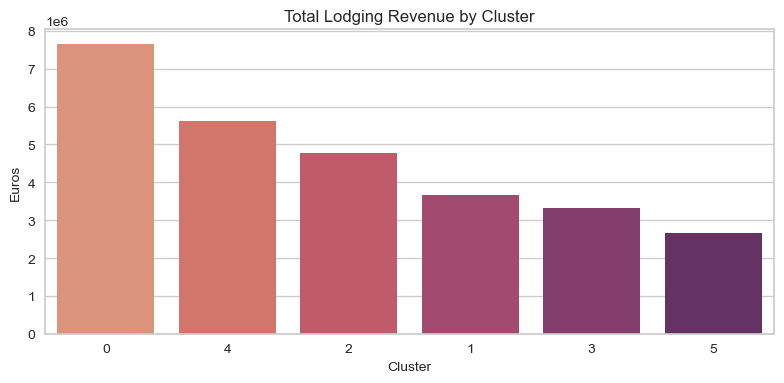

In [332]:
#Total 'LodgingRevenue' that the hotel Received by Cluster 
plt.figure(figsize=(8,4))
sns.barplot(x="Cluster", y="LodgingRevenue",data=dataset_cluster,order=dataset_cluster.sort_values("LodgingRevenue",ascending=False).Cluster,palette='flare')
plt.xlabel('Cluster')
plt.ylabel('Euros')
plt.title('Total Lodging Revenue by Cluster')
plt.tight_layout()

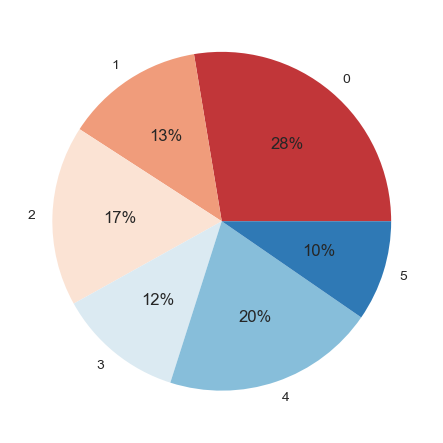

In [432]:
#Pie Chart that meausre the Total Lodging Revenu per Cluster
palette_color = sns.color_palette('RdBu')
plt.pie(dataset_cluster['LodgingRevenue'], labels = dataset_cluster['Cluster'],colors=palette_color,autopct='%.0f%%')
plt.show()

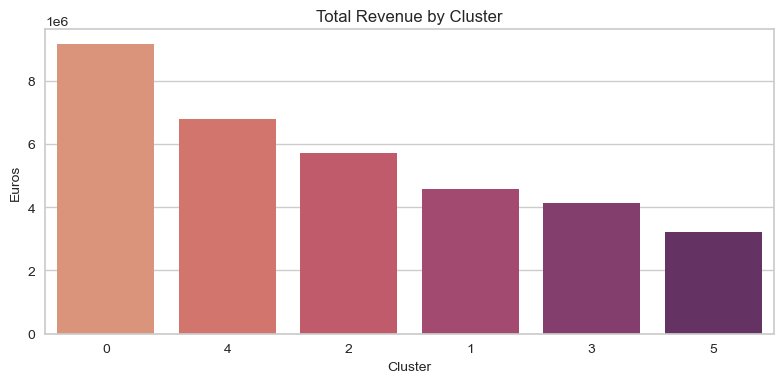

In [331]:
#Total Revenue by Cluster
plt.figure(figsize=(8,4))
sns.barplot(x="Cluster", y="Total_Revenue",data=dataset_cluster,order=dataset_cluster.sort_values("Total_Revenue",ascending=False).Cluster,palette='flare')
plt.xlabel('Cluster')
plt.ylabel('Euros')
plt.title('Total Revenue by Cluster')
plt.tight_layout()

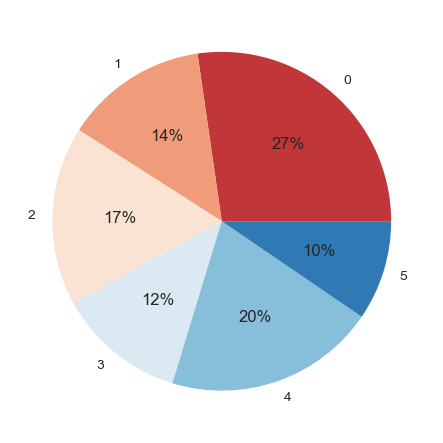

In [433]:
palette_color = sns.color_palette('RdBu')
plt.pie(dataset_cluster['Total_Revenue'], labels = dataset_cluster['Cluster'],colors=palette_color,autopct='%.0f%%')
plt.show()

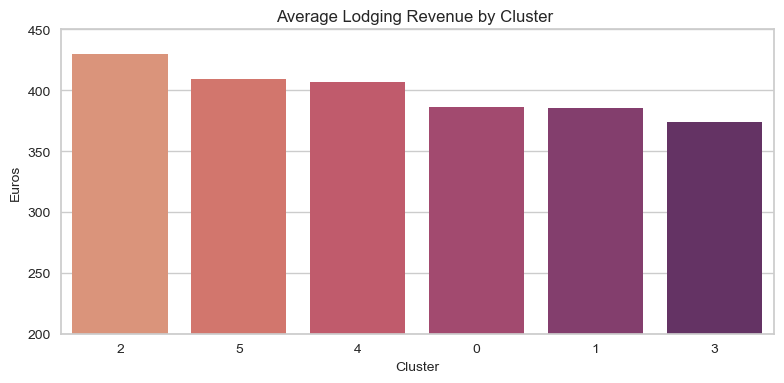

In [330]:
#Average Lodging Revenue by Cluster
plt.figure(figsize=(8,4))
sns.barplot(x="Cluster", y="Avr_Lodging Revenue",data=dataset_cluster,order=dataset_cluster.sort_values("Avr_Lodging Revenue",ascending=False).Cluster,palette='flare')
plt.xlabel('Cluster')
plt.ylabel('Euros')
plt.title('Average Lodging Revenue by Cluster ')
plt.ylim(200,450)
plt.tight_layout()

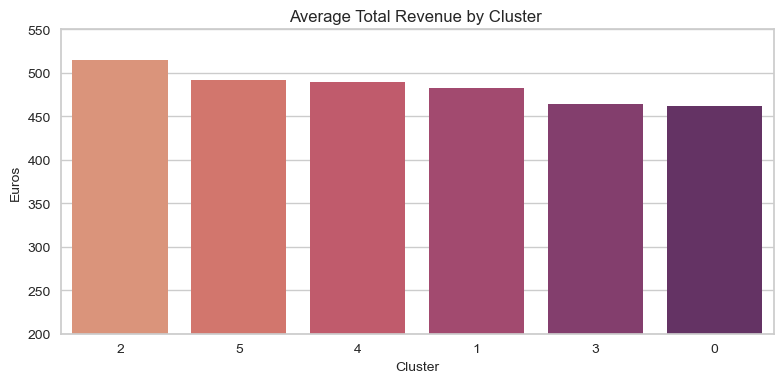

In [436]:
#Average Total Revenue by Cluster
plt.figure(figsize=(8,4))
sns.barplot(x="Cluster", y="Avr_Total Revenue",data=dataset_cluster,order=dataset_cluster.sort_values("Avr_Total Revenue",ascending=False).Cluster,palette='flare')
plt.xlabel('Cluster')
plt.ylabel('Euros')
plt.title('Average Total Revenue by Cluster ')
plt.ylim(200,550)
plt.tight_layout()

##### Days Since Creation

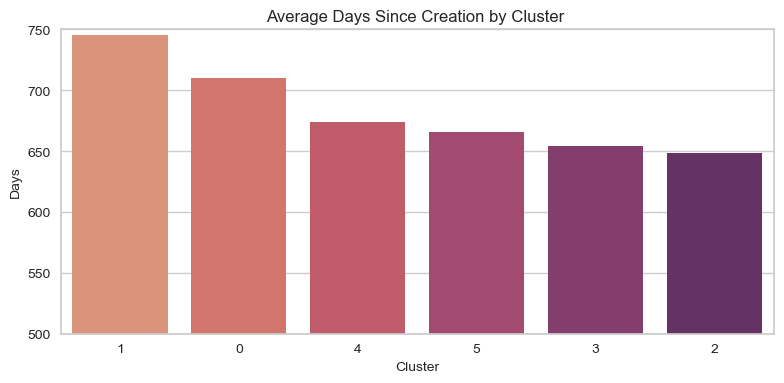

In [362]:
plt.figure(figsize=(8,4))
sns.barplot(x="Cluster", y="Avr_DaysSinceCreation",data=dataset_cluster,order=dataset_cluster.sort_values("Avr_DaysSinceCreation",ascending=False).Cluster,palette='flare')
plt.xlabel('Cluster')
plt.ylabel('Days')
plt.title('Average Days Since Creation by Cluster ')
plt.ylim(500,750)
plt.tight_layout()

#### AverageLeadTime

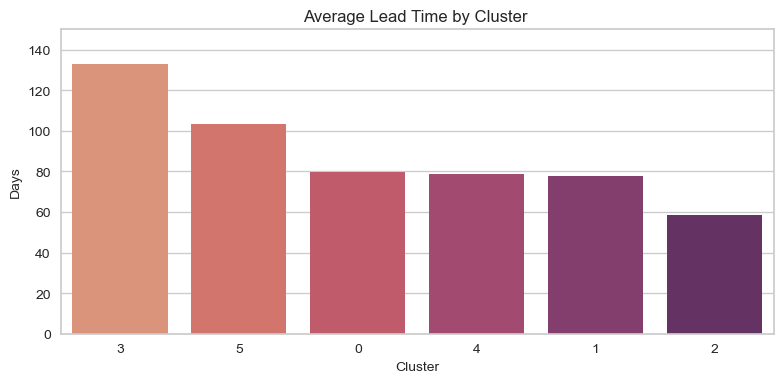

In [363]:
plt.figure(figsize=(8,4))
sns.barplot(x="Cluster", y="Avr_LeadTime",data=dataset_cluster,order=dataset_cluster.sort_values("Avr_LeadTime",ascending=False).Cluster,palette='flare')
plt.xlabel('Cluster')
plt.ylabel('Days')
plt.title('Average Lead Time by Cluster ')
plt.ylim(0,150)
plt.tight_layout()

#### Lodging Revenue combined with multiple variables

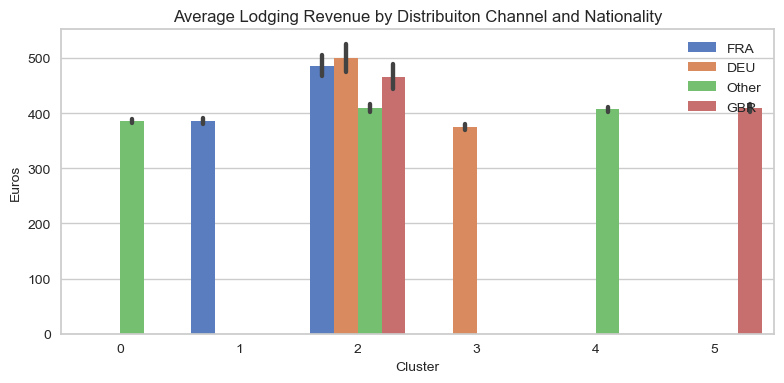

In [383]:
#Average Lodging Revenue by Cluster and Nationality
plt.figure(figsize=(8,4))
sns.barplot(x="Cluster", y='LodgingRevenue',hue="Nationality",data=dataset_visualization,palette='muted')
plt.xlabel('Cluster')
plt.ylabel('Euros')
plt.title('Average Lodging Revenue by Distribuiton Channel and Nationality')
plt.ylim(0,)
plt.legend(loc='upper right')
plt.tight_layout()

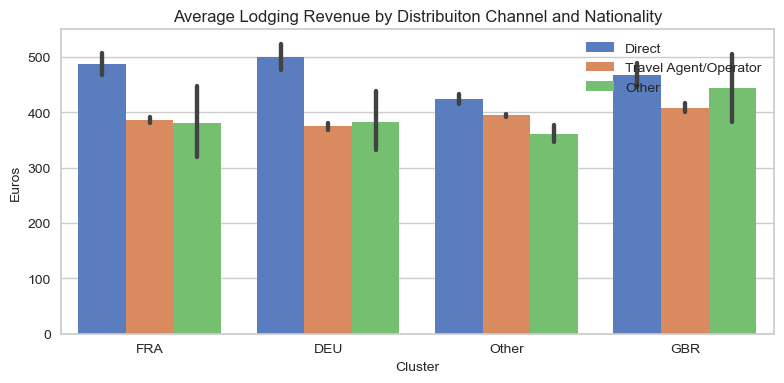

In [384]:
#Average Lodging Revenue by Nationality and DistribuitonChannel
plt.figure(figsize=(8,4))
sns.barplot(x="Nationality", y='LodgingRevenue',hue="DistribuitonChannel",data=dataset_visualization,palette='muted')
plt.xlabel('Cluster')
plt.ylabel('Euros')
plt.title('Average Lodging Revenue by Distribuiton Channel and Nationality')
plt.ylim(0,)
plt.legend(loc='upper right')
plt.tight_layout()

##### King Size Bed

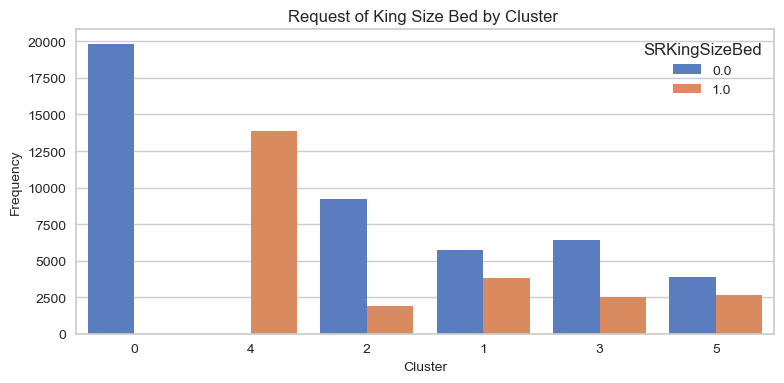

In [491]:
#Frequency 
plt.figure(figsize=(8,4))
sns.countplot(x='Cluster',hue='SRKingSizeBed' ,data=dataset_visualization ,order=dataset_visualization['Cluster'].value_counts().index,palette='muted')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Request of King Size Bed by Cluster ')
plt.tight_layout()